In [1]:
import cmath
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import RMT # Importing the RMT module

In [2]:
# Set parameters
Size = 200          # Matrix size (e.g., 50x50)
Samples = 10000       # Number of samples
Lower = 0           # Histogram lower bound
Upper = 5         # Histogram upper bound
binno = 100          # Number of histogram bins
p = 1.00               # Thinning probability (1 = no thinning)

In [3]:
# Check if there's a folder called ThinnedEigenvalues
import os
if not os.path.exists("ThinnedEigenvalues"):
    os.makedirs("ThinnedEigenvalues")

EigenFrame = RMT.generate_eigenangles_coe(Size, Samples)

In [4]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define p values: 1.00, 0.99, ..., 0.01 (keep probabilities)
PRange = [x / 100 for x in range(100, 0, -1)]
print("Keep probabilities (p):", PRange)

ThinnedDict = {}
print("Starting p-range processing...")

# Loop over keep probabilities
for p in tqdm(PRange, desc="Processing thinning levels"):
    runframe = np.copy(EigenFrame)
    data = RMT.thin_and_spacings_from_array(runframe, p)

    if len(data) == 0:
        continue  # Skip if no spacings can be formed

    # Histogram of normalized spacings
    hist, bins = np.histogram(
        data, range=(Lower, Upper), bins=binno, density=True
    )

    # Normalize so total area = 1
    bin_width = np.diff(bins)[0]
    HistArea = np.sum(hist * bin_width)
    if HistArea > 0:
        hist = hist / HistArea

    # Save histogram
    p = round(p, 2)  # round for clean dictionary keys and filenames
    ThinnedDict[p] = hist
    filename = f"ThinnedEigenvalues/Thin_{p:.2f}.csv"
    np.savetxt(filename, hist, delimiter=",")
bin_centres = 0.5 * (bins[:-1] + bins[1:])
ThinnedDict["Bins"] = bins
ThinnedDict["BinCenters"] = bin_centres
print("Finished processing all p values.")

Keep probabilities (p): [1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7, 0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3, 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
Starting p-range processing...


Processing thinning levels: 100%|██████████| 100/100 [00:24<00:00,  4.02it/s]

Finished processing all p values.


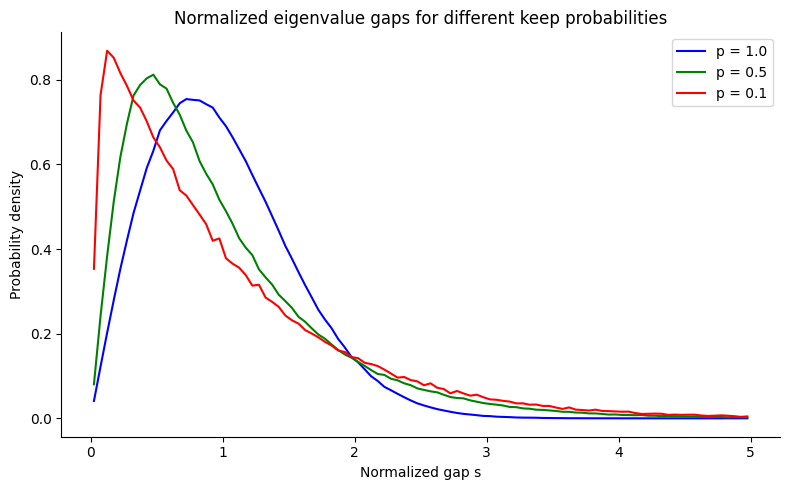

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: visualize three levels of thinning
example_ps = [1.0, 0.5, 0.1]  # keep probabilities to visualize
colors = ["blue", "green", "red"]

plt.figure(figsize=(8, 5))

for p, color in zip(example_ps, colors):
    # Round p to match the dictionary keys
    key = round(p, 2)
    
    if key in ThinnedDict:
        hist = ThinnedDict[key]
        bins = np.linspace(Lower, Upper, binno + 1)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        plt.plot(bin_centers, hist, label=f"p = {key}", color=color)
    else:
        print(f"No data for p = {key}")

plt.xlabel("Normalized gap s")
plt.ylabel("Probability density")
plt.title("Normalized eigenvalue gaps for different keep probabilities")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


In [6]:
import numpy as np
# Generate random exponential samples
Exp = np.random.exponential(scale=1.0, size=10000)

# Normalize to have mean = 1
Exp /= np.mean(Exp)
print(f"Mean after normalization: {np.mean(Exp)}")

sns.histplot(data=Exp, bins=binno, kde=True, stat="density")

# Area under the histogram of exponential samples should be 1
hist_exp, bins = np.histogram(Exp, range=(Lower, Upper), bins=binno, density=True)
hist_exp = np.array([np.exp(-x).astype(float) for x in bins[1:]])
# Area under the histogram should be 1
bin_width = np.diff(bins)[0]
HistArea = np.sum(hist_exp * bin_width)
hist_exp = hist_exp / HistArea
HistAreaTest = np.sum(hist_exp * bin_width)
assert np.isclose(HistAreaTest, 1), "Histogram area is not 1."

ThinnedDict[0.00] = hist_exp
# Turn bins into bin edges for reference

#ThinnedDict["Bins"] = bins[:-1]  # Store bin edges for reference

# Save to file
p = 0.00
filename = f"ThinnedEigenvalues/Thin_{p:.2f}.csv"
#np.savetxt(filename, hist_exp, delimiter=",")
print(f"Saved normalized exponential samples to {filename}.")

Mean after normalization: 1.0
Saved normalized exponential samples to ThinnedEigenvalues/Thin_0.00.csv.


Plot RMT (p=1) against Wigner's surmise known formula

dict_keys([1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7, 0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3, 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 'Bins', 'BinCenters', 0.0])


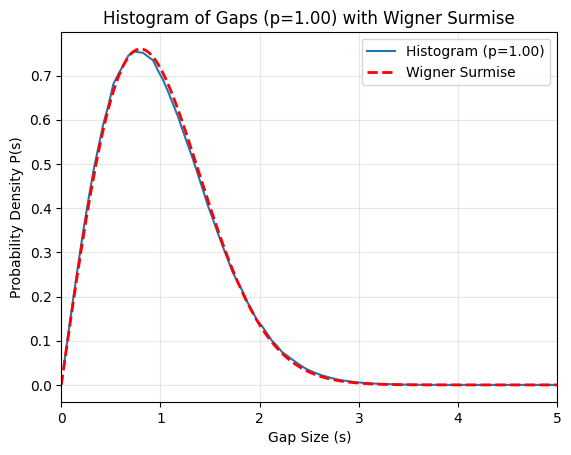

In [7]:
def WignerSurmise(x):
    """Wigner Surmise for GOE."""
    return (np.pi / 2) * x * np.exp(- (np.pi / 4) * x**2)

print(ThinnedDict.keys())
thinnedhist = ThinnedDict[1.0]
thinnedhist = thinnedhist / np.sum(thinnedhist * bin_width)
bins = ThinnedDict["Bins"]
bincentres = ThinnedDict["BinCenters"]
# Plot p = 1.00 histogram with Wigner Surmise overlay
plt.plot(bincentres, thinnedhist, label='Histogram (p=1.00)', color='C0')

# This part for overlaying the theoretical curve is correct
x_vals = np.linspace(0, 5, 200)
y_vals = WignerSurmise(x_vals)
#Rescale y_vals to match histogram area
y_vals = y_vals / np.sum(y_vals * (x_vals[1] - x_vals[0]))
plt.plot(x_vals, y_vals, 'r--', label='Wigner Surmise', linewidth=2)

plt.title("Histogram of Gaps (p=1.00) with Wigner Surmise")
plt.xlabel("Gap Size (s)")
plt.ylabel("Probability Density P(s)")
plt.legend()
plt.xlim(0, 5) # Often good to set x-limits for spacing plots
plt.grid(alpha=0.3)
plt.show()


In [8]:
import RMT

arabidopsis_Interorigin_spacing.csv
Extracting File:  arabidopsis
Creating Histogram for:  arabidopsis
1.0
Plotting DNA and Thinned for:  arabidopsis
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


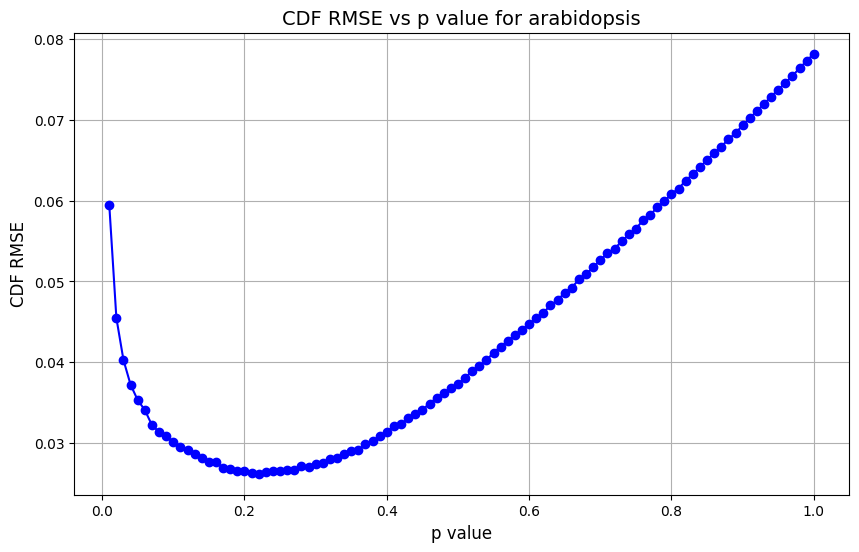

Minimum p value in coarse search: 0.22 with CDF RMSE: 0.02617715872909145


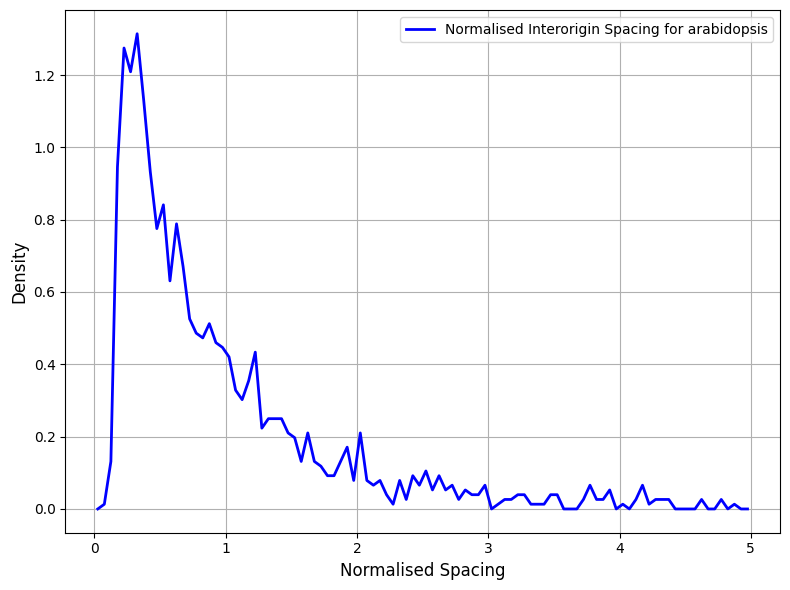

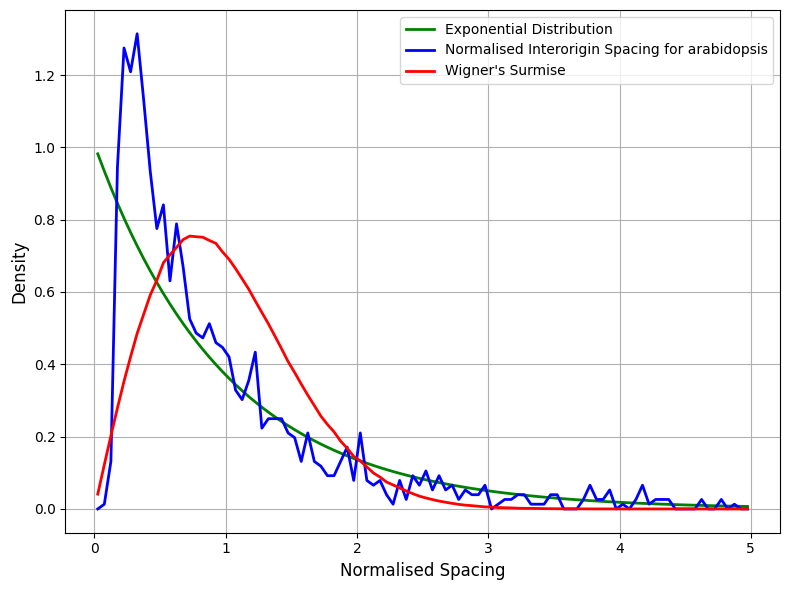

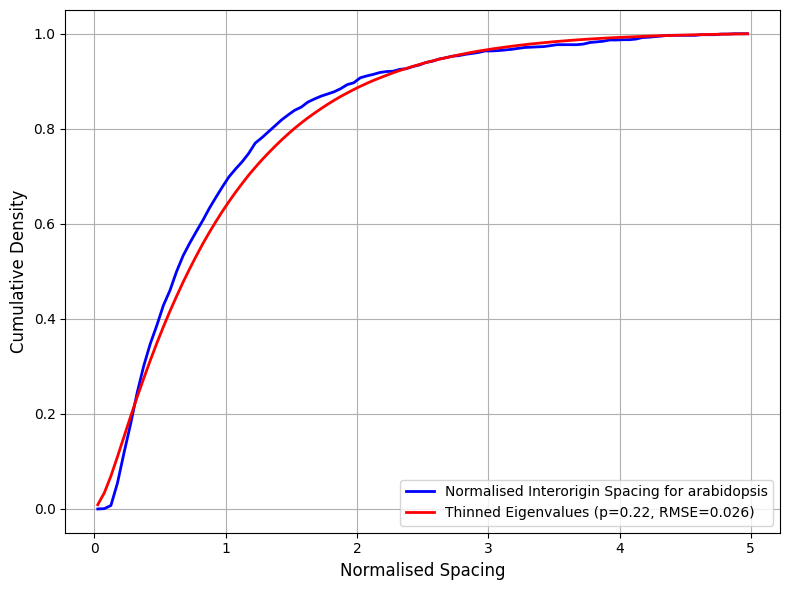

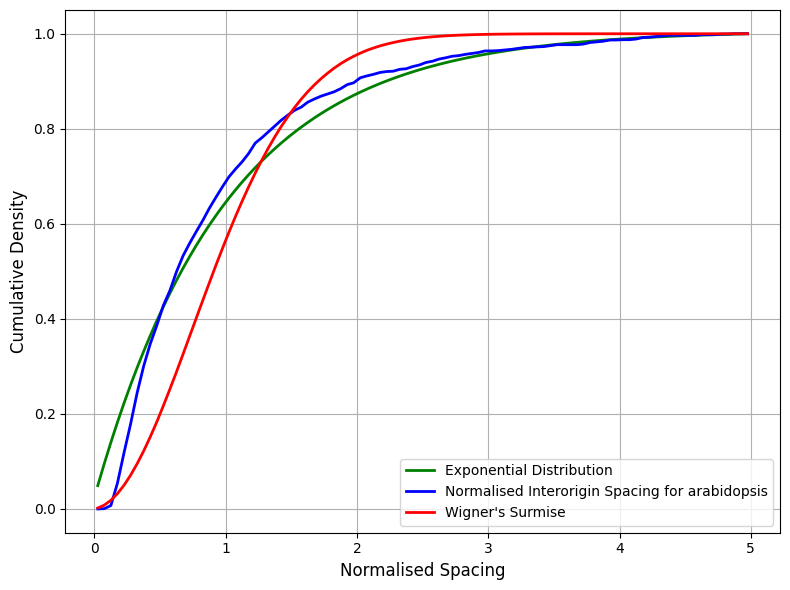

Done with:  arabidopsis


candida_CBS138_Interorigin_spacing.csv
Extracting File:  candida_CBS138
Creating Histogram for:  candida_CBS138
1.0
Plotting DNA and Thinned for:  candida_CBS138
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


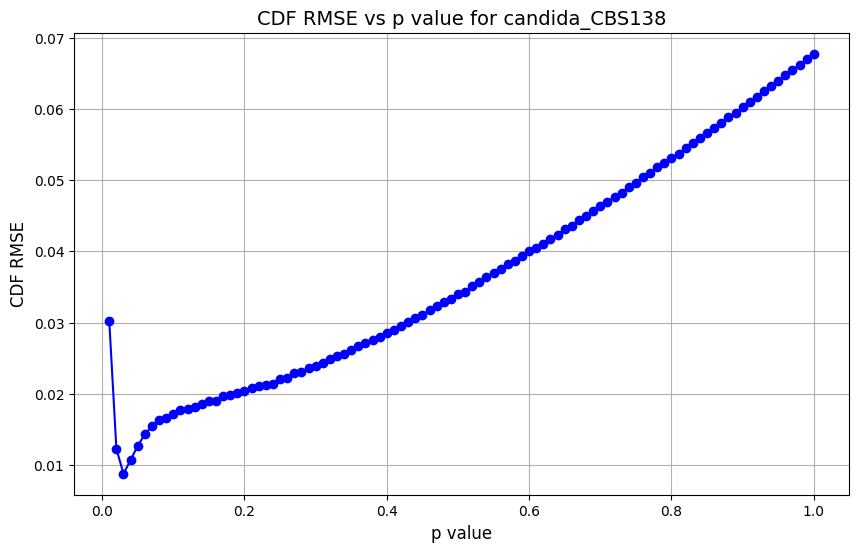

Minimum p value in coarse search: 0.03 with CDF RMSE: 0.008781019777835103


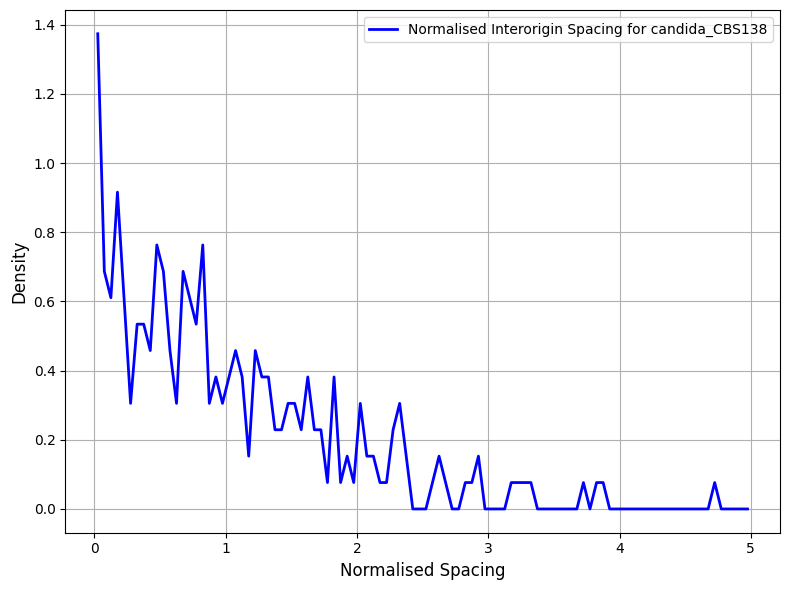

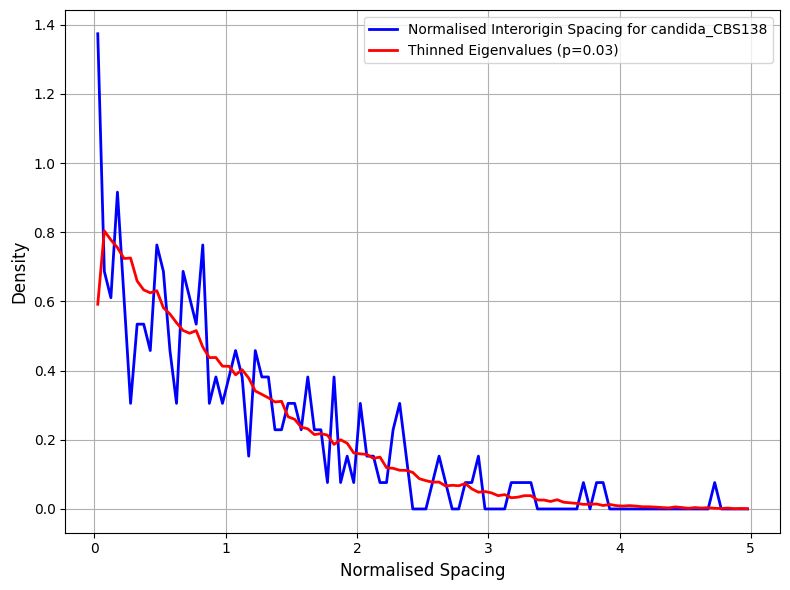

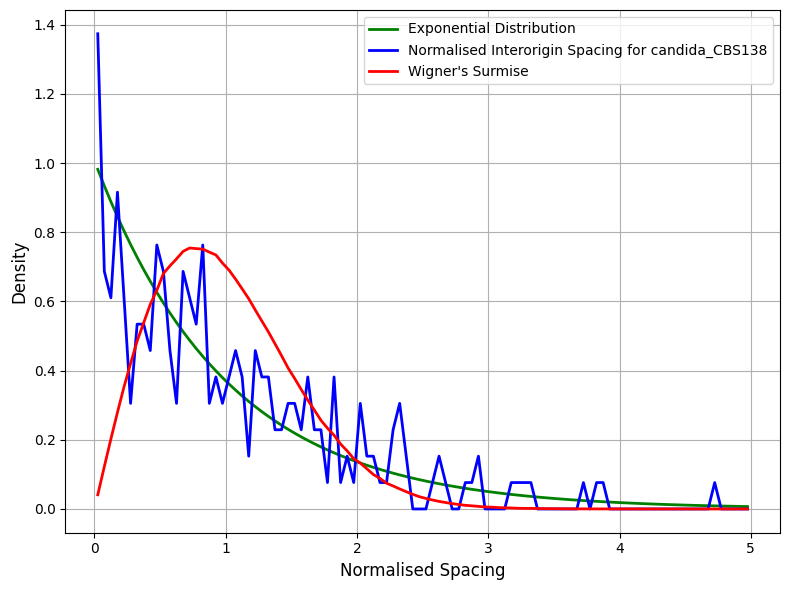

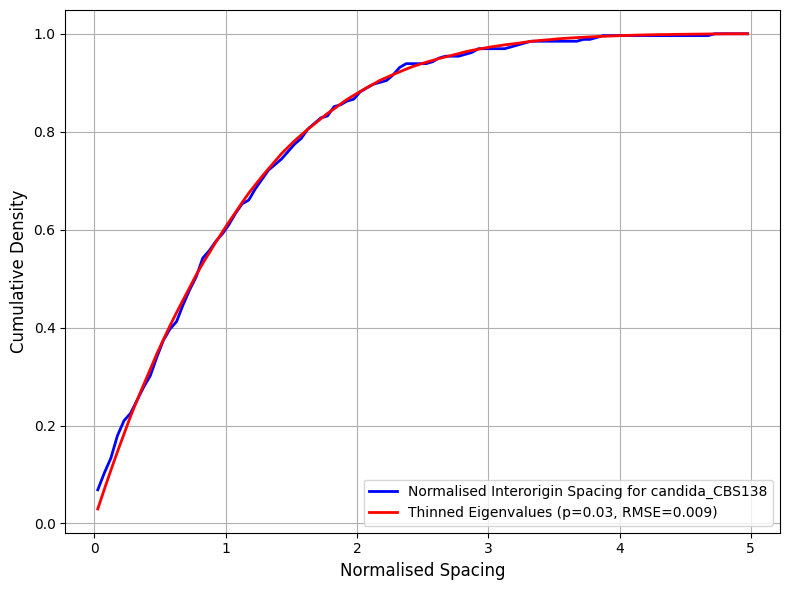

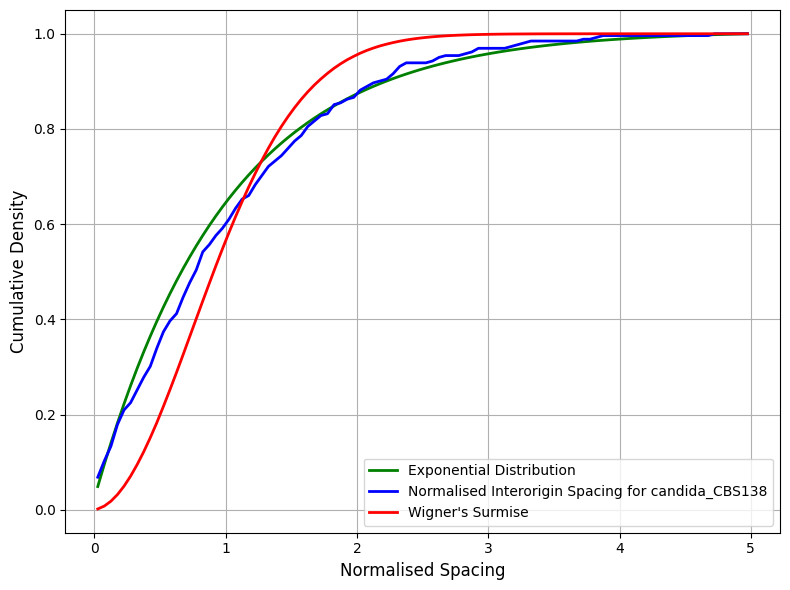

Done with:  candida_CBS138


drosophila_Kc_Interorigin_spacing.csv
Extracting File:  drosophila_Kc
Creating Histogram for:  drosophila_Kc
1.0
Plotting DNA and Thinned for:  drosophila_Kc
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


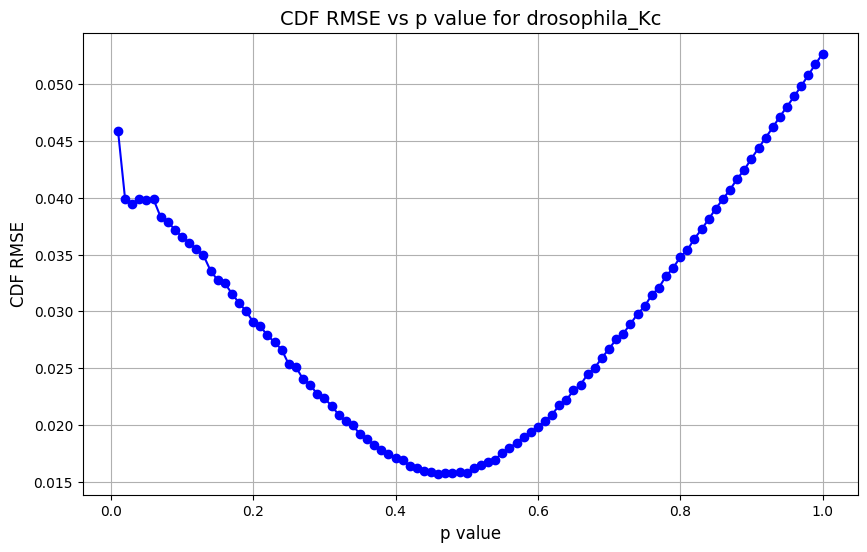

Minimum p value in coarse search: 0.46 with CDF RMSE: 0.015696438482308332


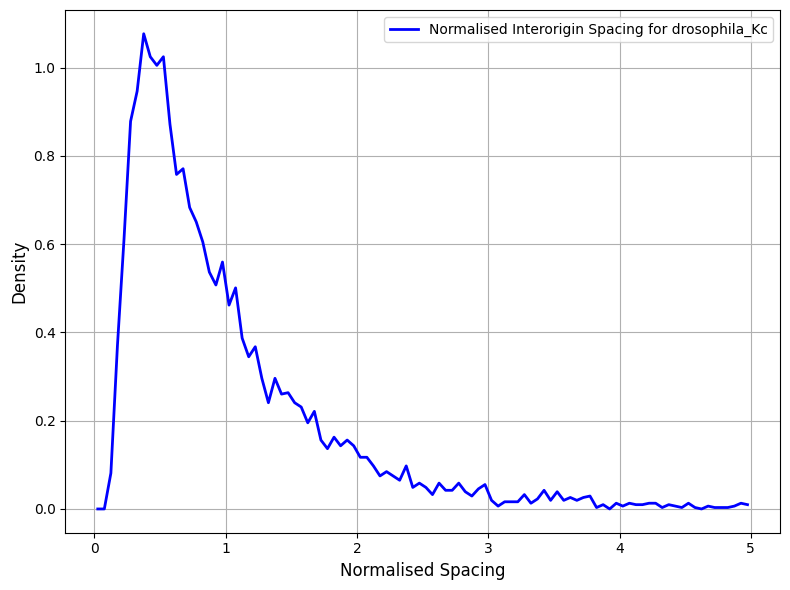

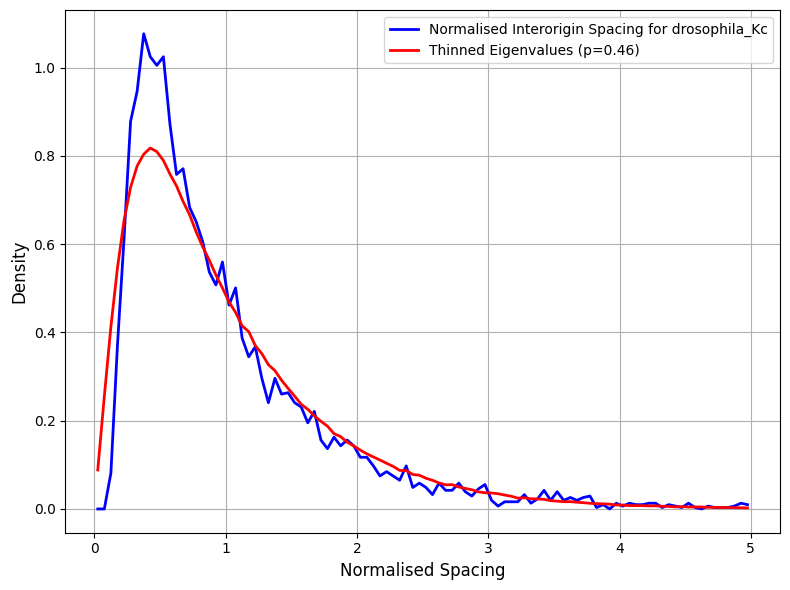

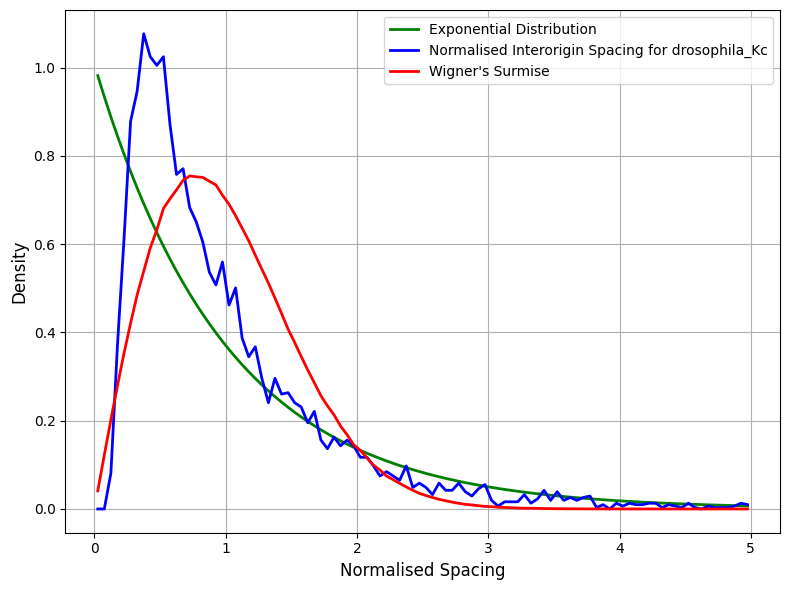

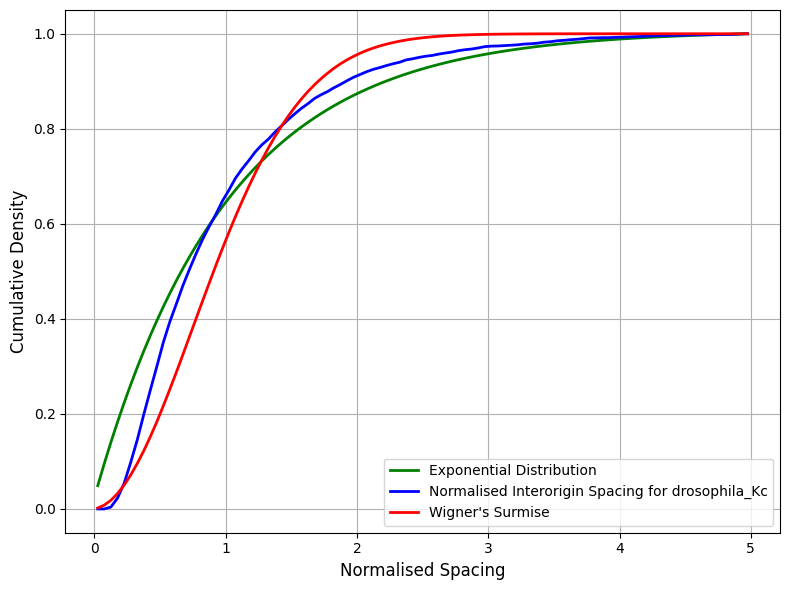

Done with:  drosophila_Kc


drosophila_S2_Interorigin_spacing.csv
Extracting File:  drosophila_S2
Creating Histogram for:  drosophila_S2
1.0
Plotting DNA and Thinned for:  drosophila_S2
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


Minimum p value in coarse search: 0.11 with CDF RMSE: 0.038142290906162


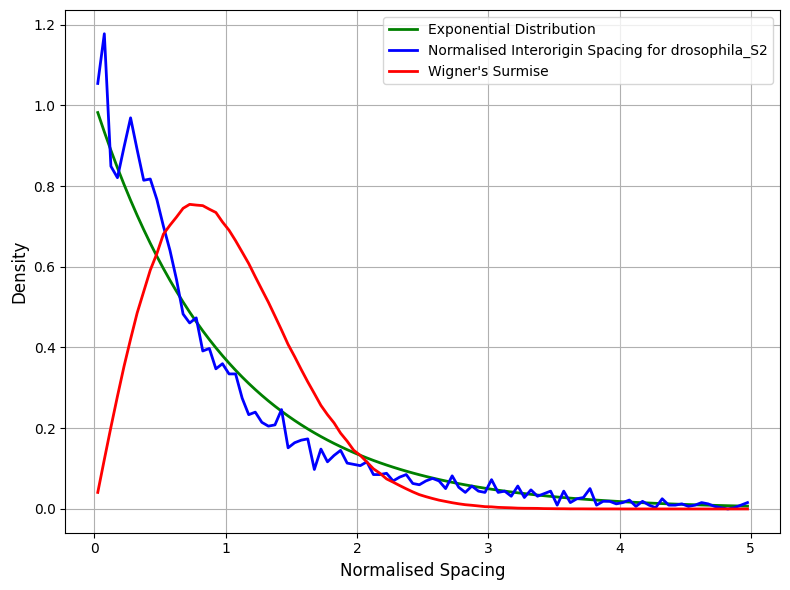

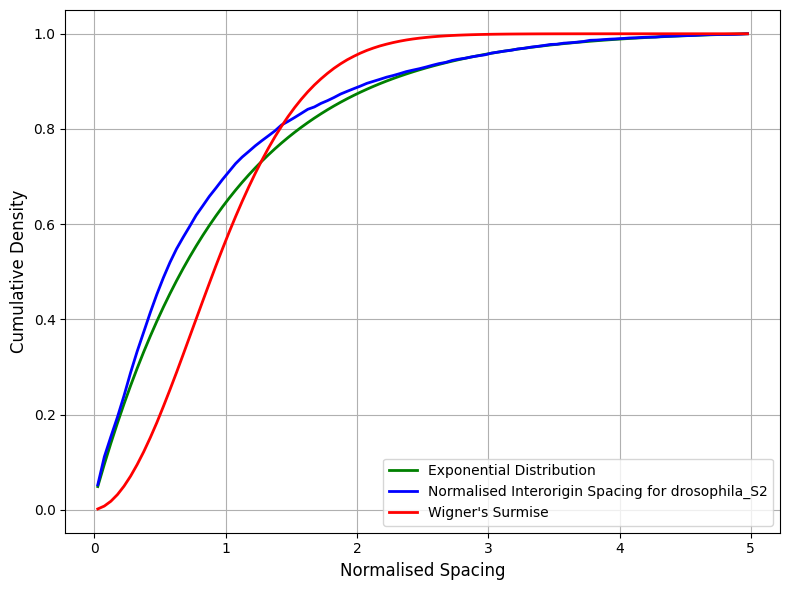

Done with:  drosophila_S2


human_K562_Interorigin_spacing.csv
Extracting File:  human_K562
Creating Histogram for:  human_K562
1.0
Plotting DNA and Thinned for:  human_K562
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


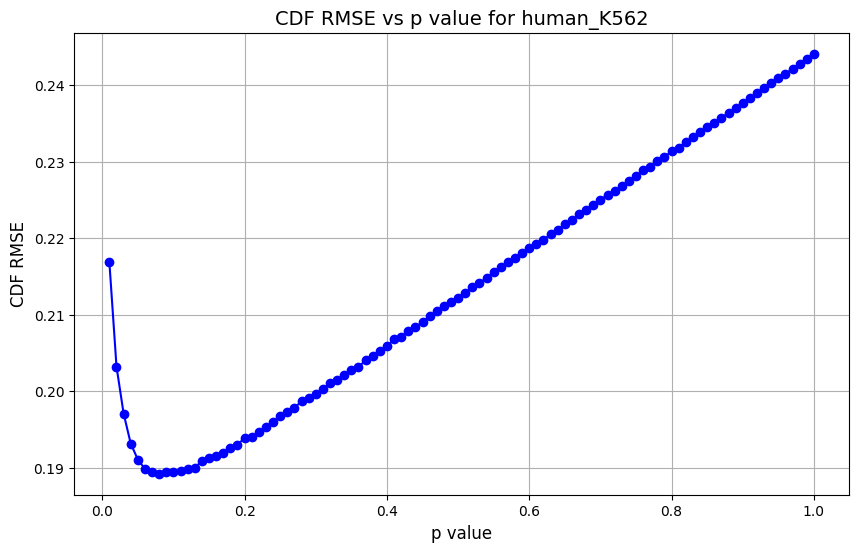

Minimum p value in coarse search: 0.08 with CDF RMSE: 0.1892336521413656


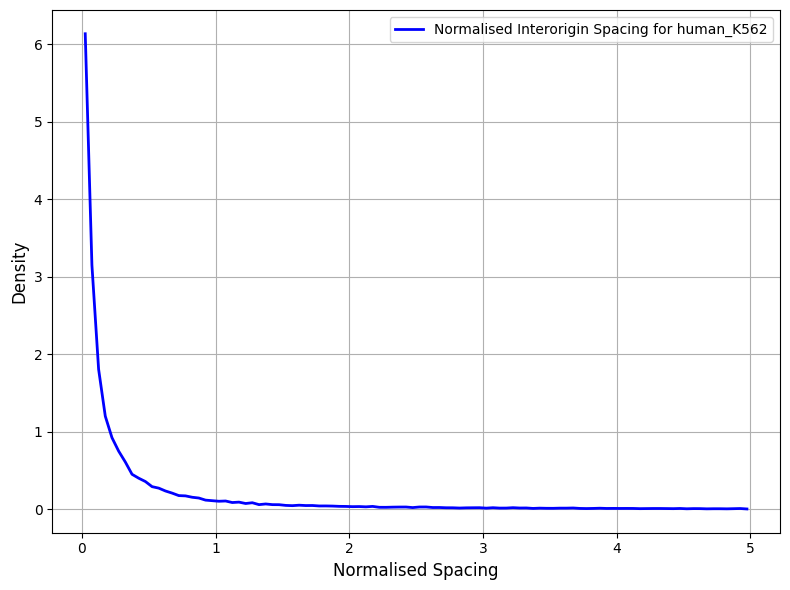

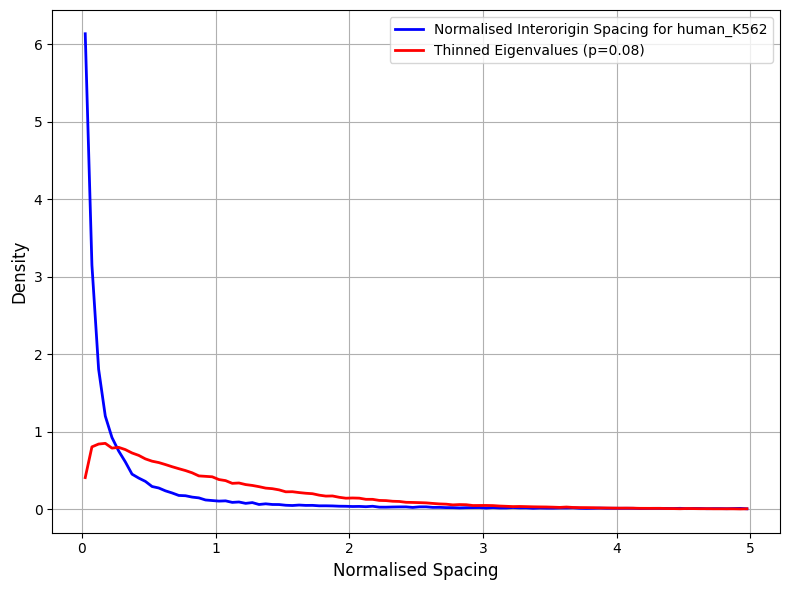

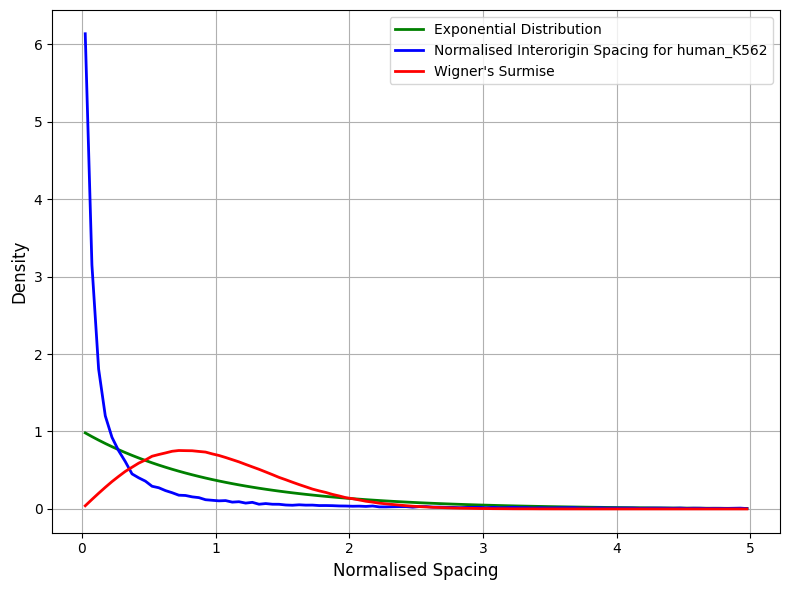

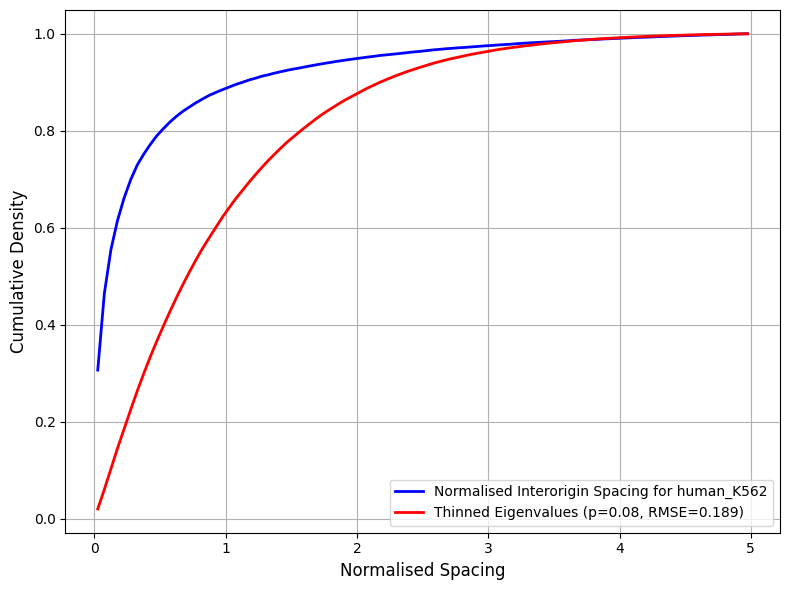

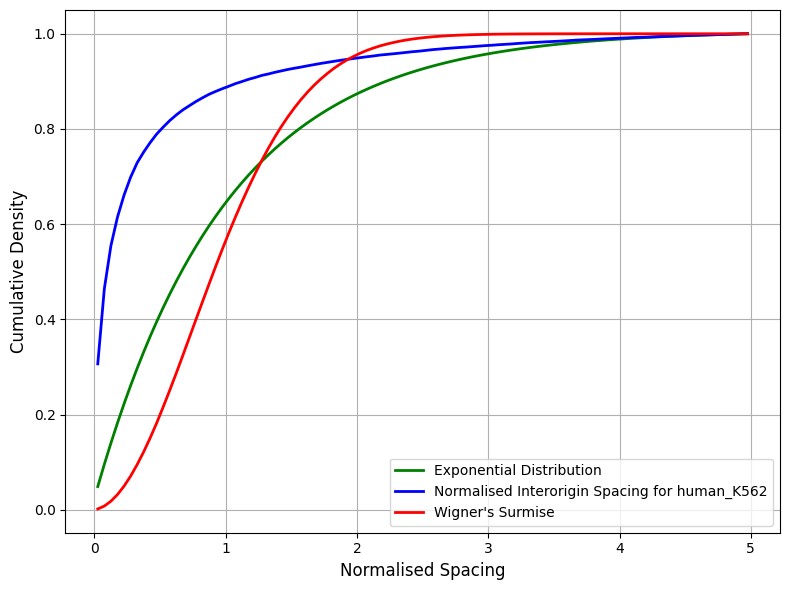

Done with:  human_K562


human_MCF7_Interorigin_spacing.csv
Extracting File:  human_MCF7
Creating Histogram for:  human_MCF7
0.9999999999999997
Plotting DNA and Thinned for:  human_MCF7
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


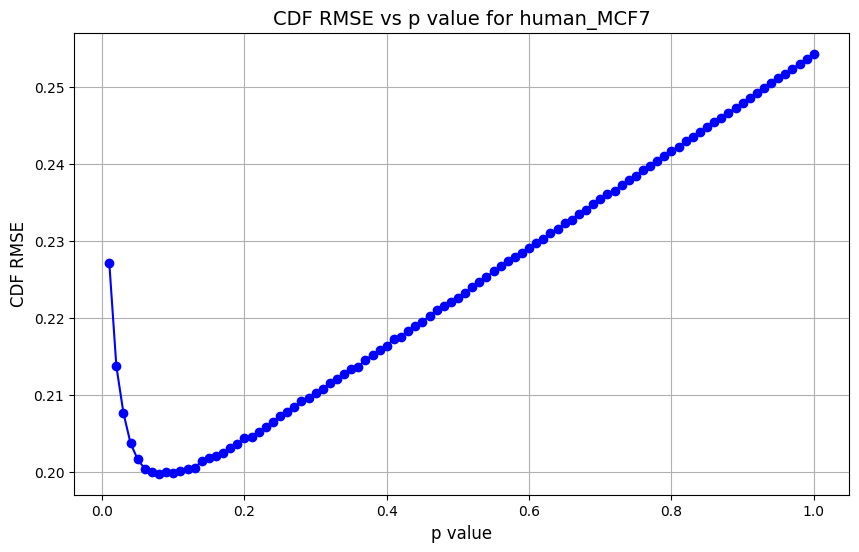

Minimum p value in coarse search: 0.08 with CDF RMSE: 0.19977054776829656


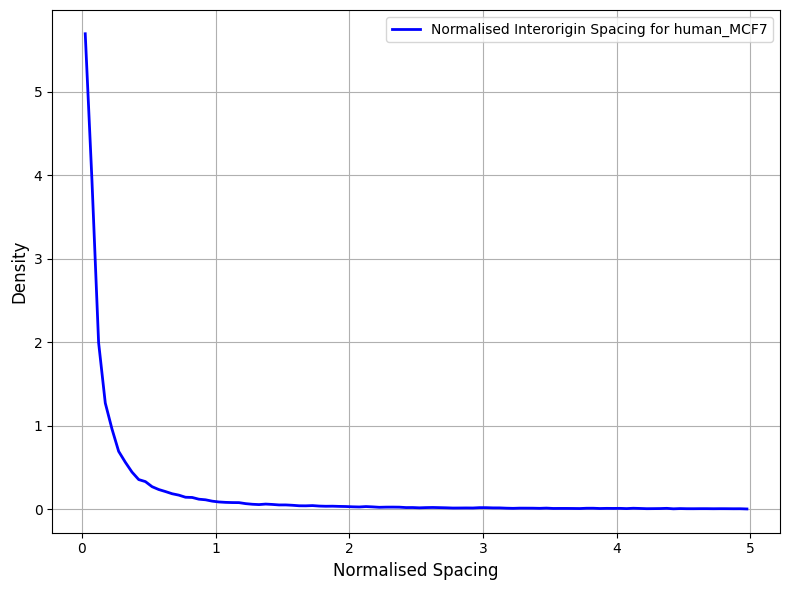

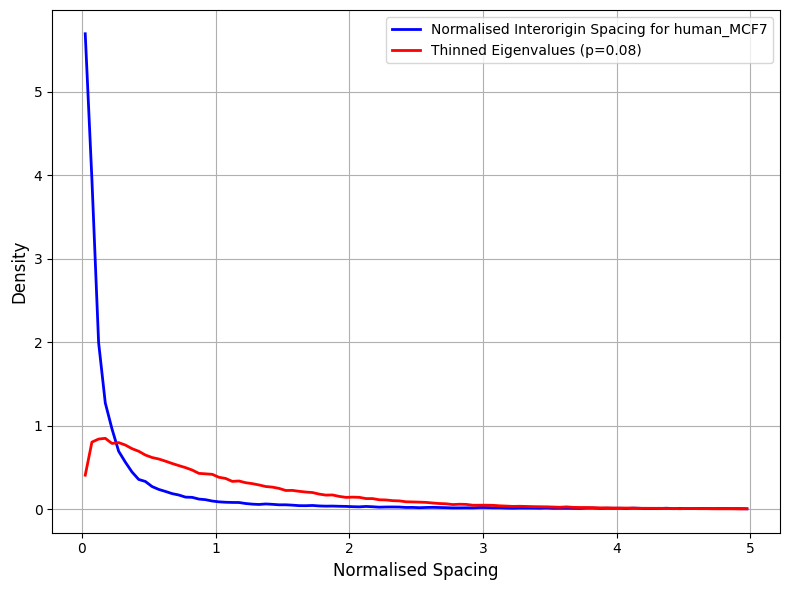

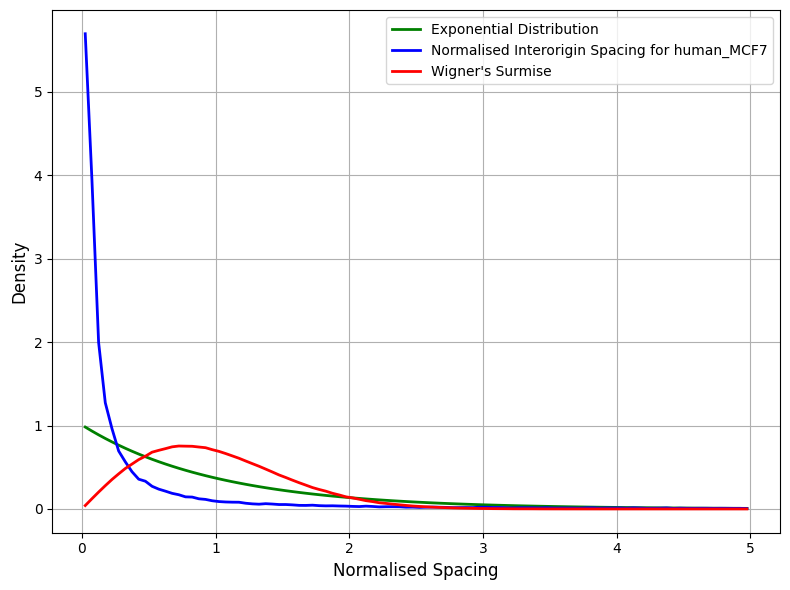

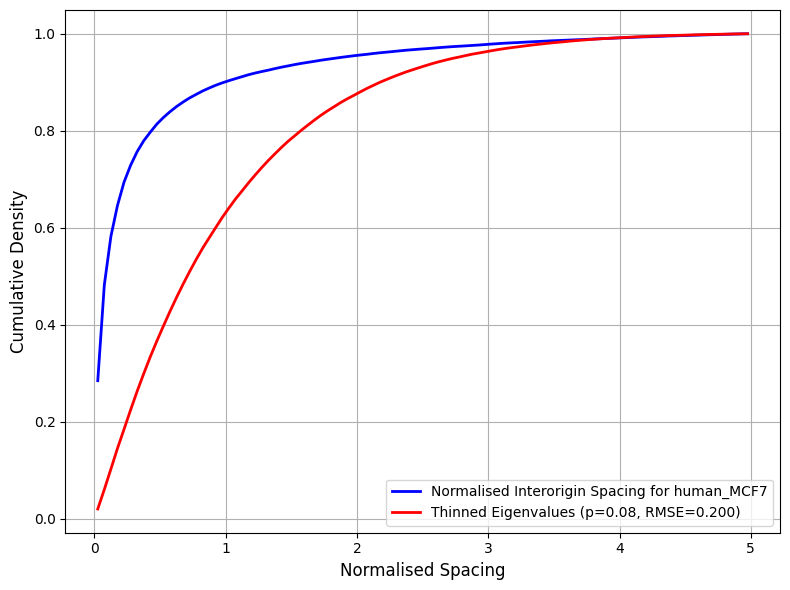

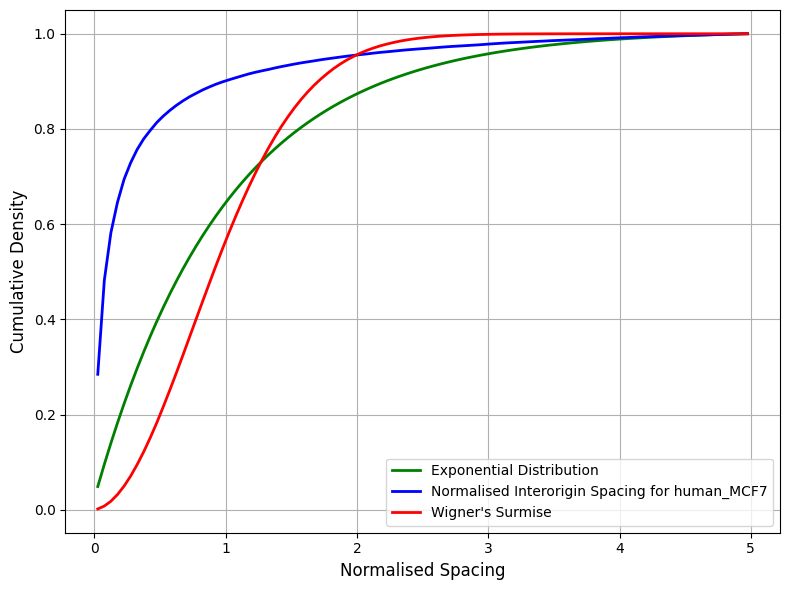

Done with:  human_MCF7


k_lactis_Interorigin_spacing.csv
Extracting File:  k_lactis
Creating Histogram for:  k_lactis
1.0
Plotting DNA and Thinned for:  k_lactis
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


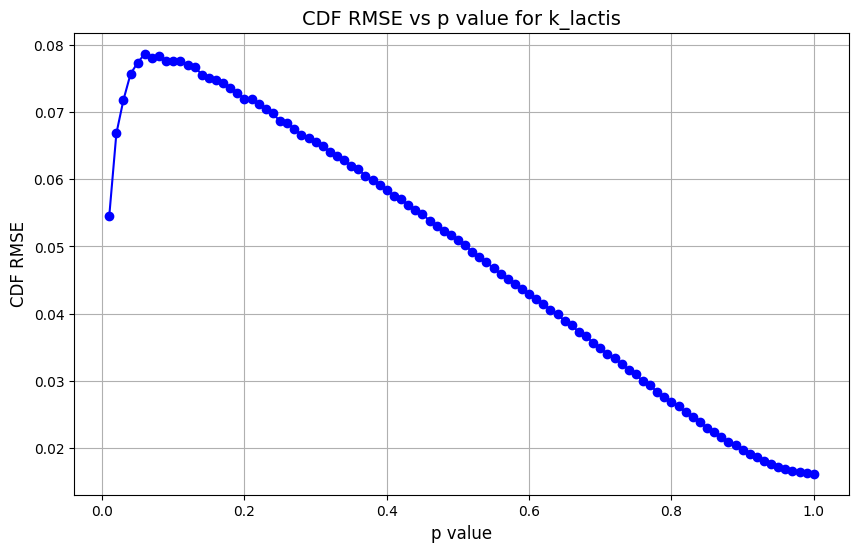

Minimum p value in coarse search: 1.0 with CDF RMSE: 0.016179296278144416


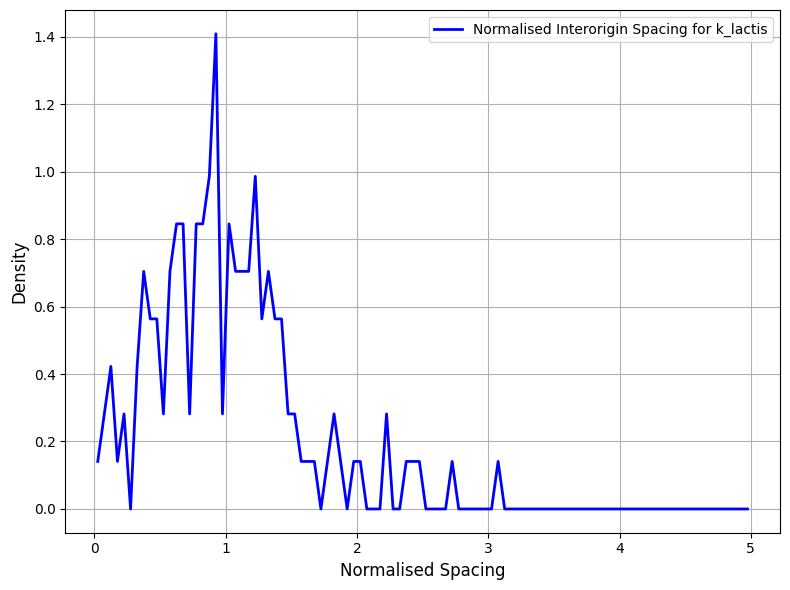

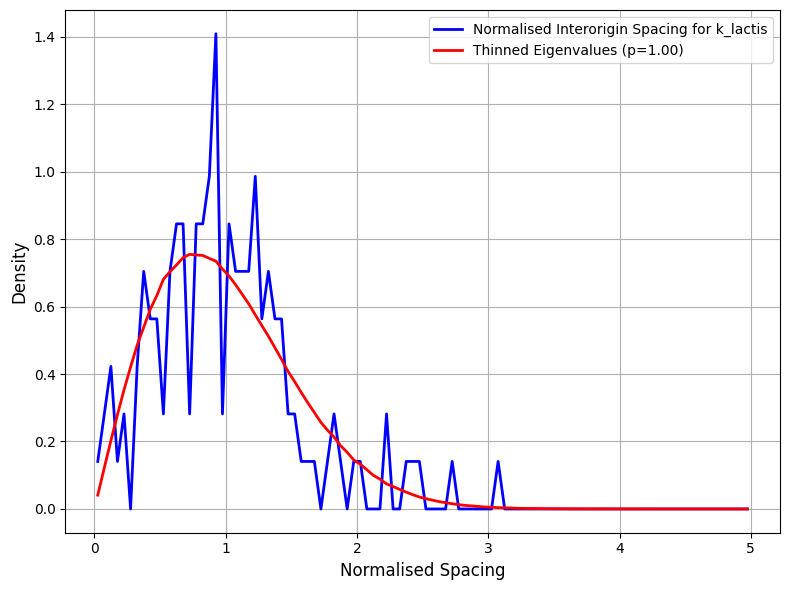

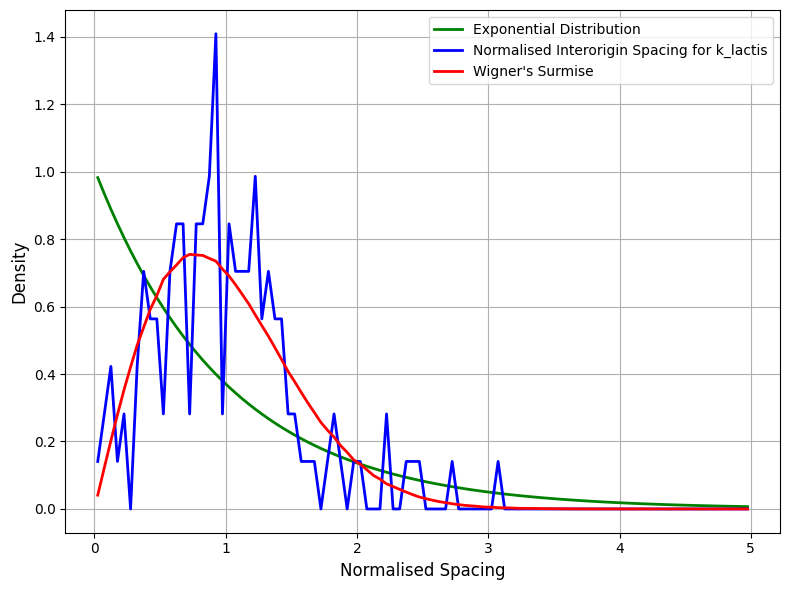

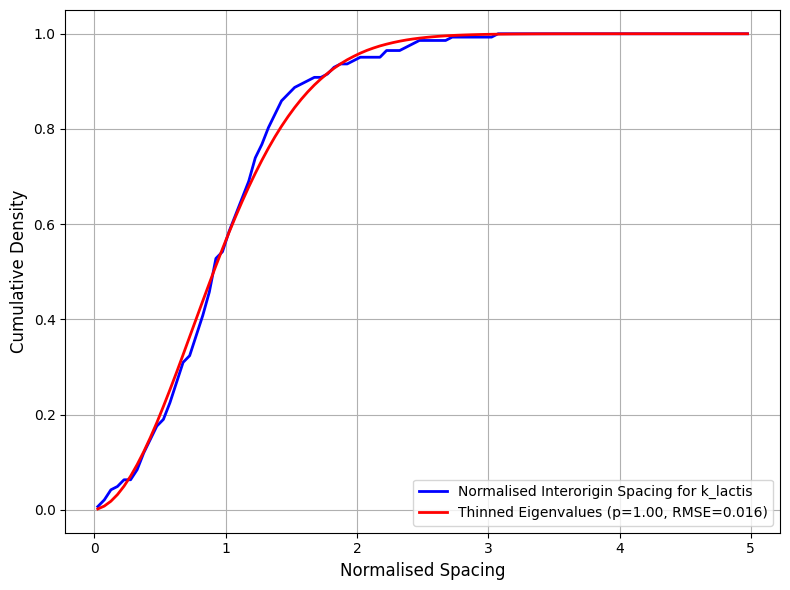

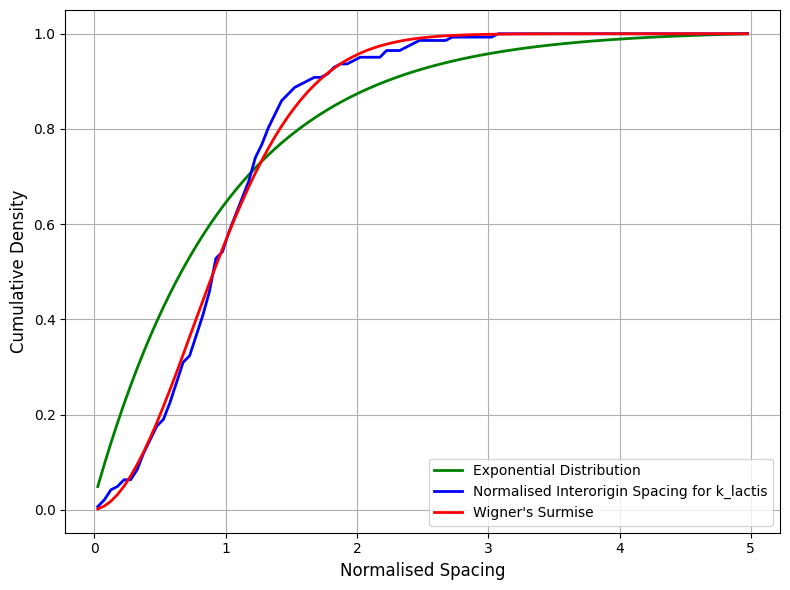

Done with:  k_lactis


L_waltii_Interorigin_spacing.csv
Extracting File:  L_waltii
Creating Histogram for:  L_waltii
1.0
Plotting DNA and Thinned for:  L_waltii
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


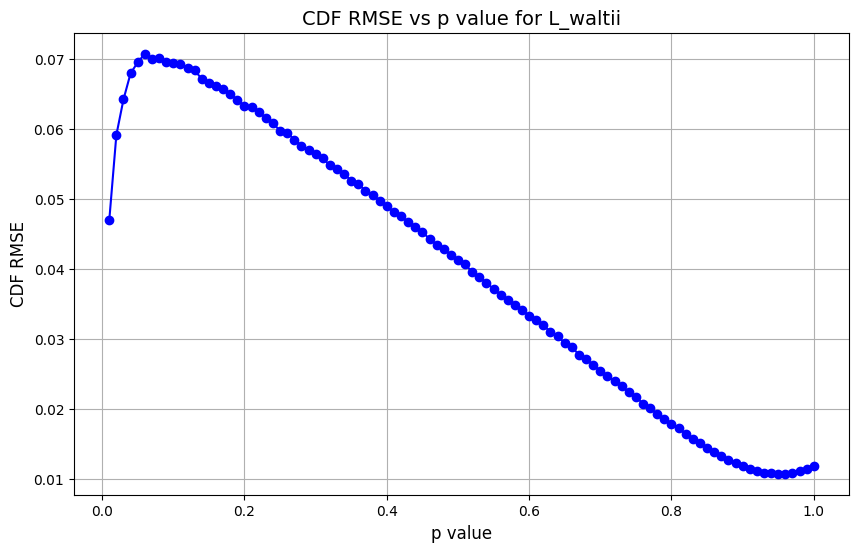

Minimum p value in coarse search: 0.9500000000000001 with CDF RMSE: 0.010739866587912528


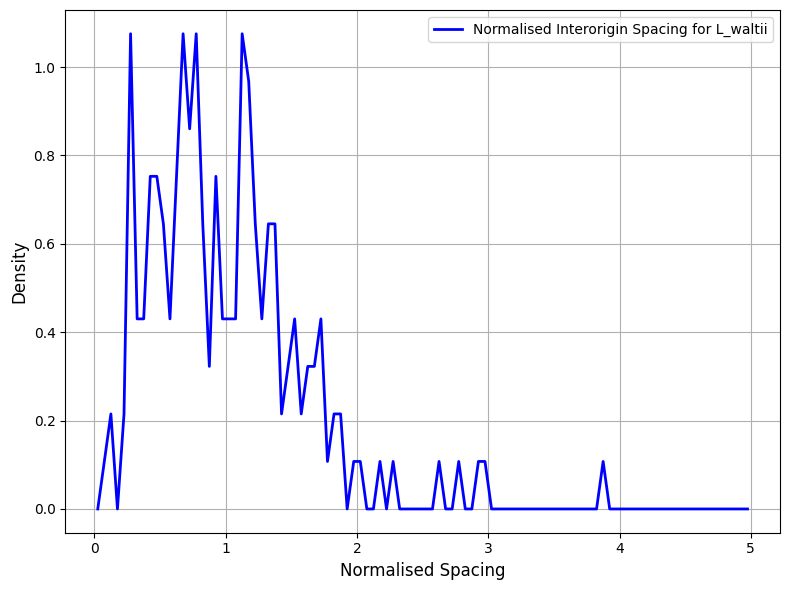

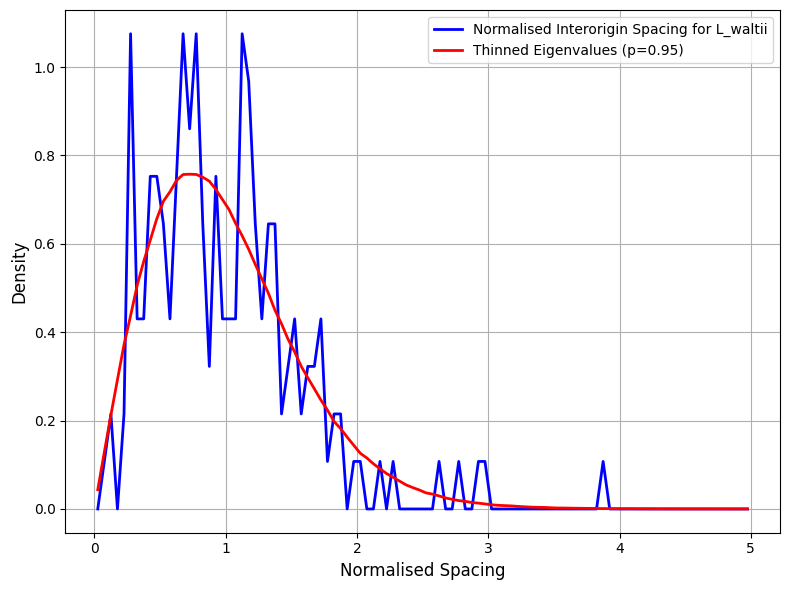

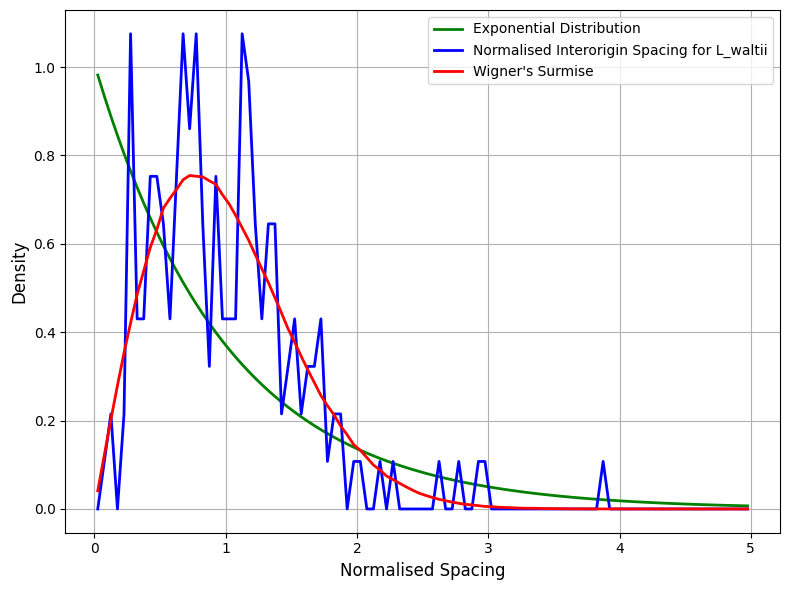

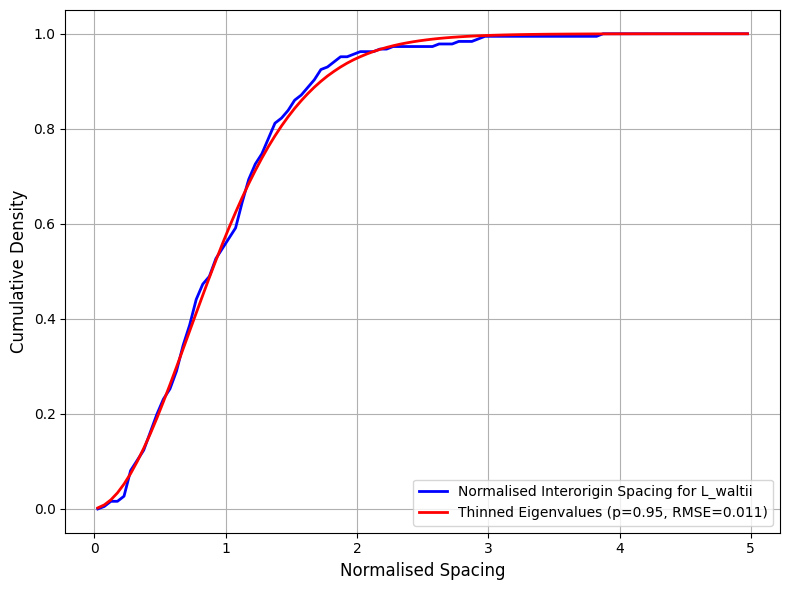

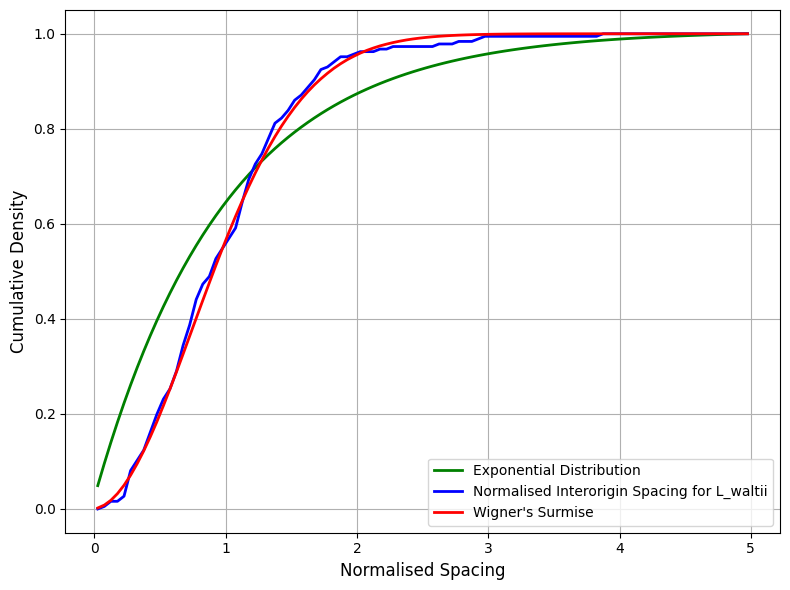

Done with:  L_waltii


mouse_ES1_Interorigin_spacing.csv
Extracting File:  mouse_ES1
Creating Histogram for:  mouse_ES1
1.0
Plotting DNA and Thinned for:  mouse_ES1
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


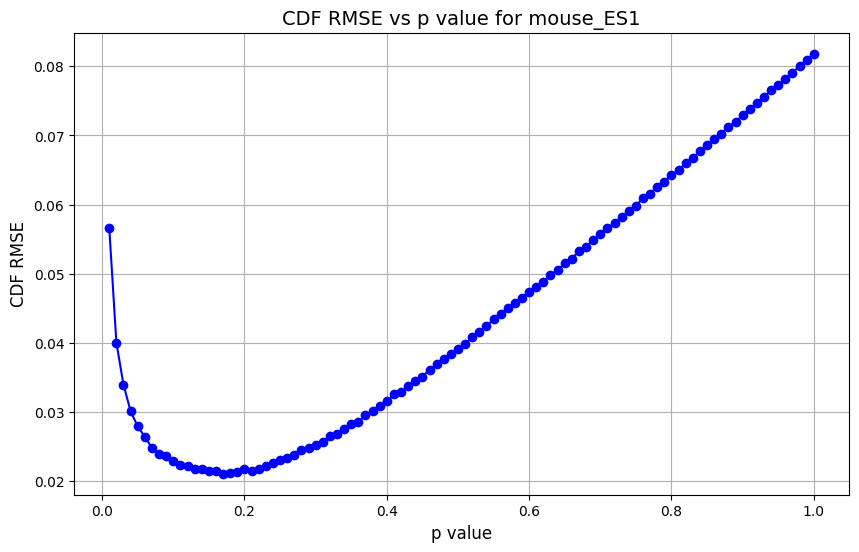

Minimum p value in coarse search: 0.17 with CDF RMSE: 0.021086747743255592


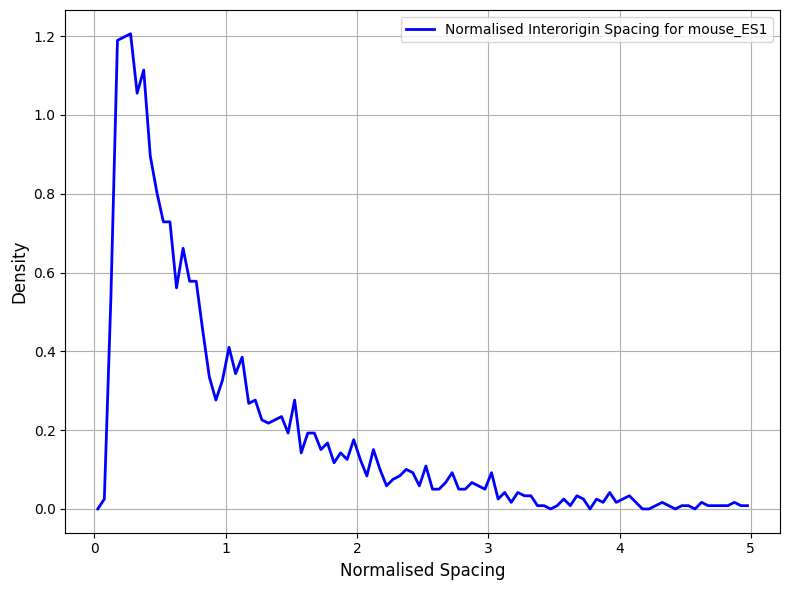

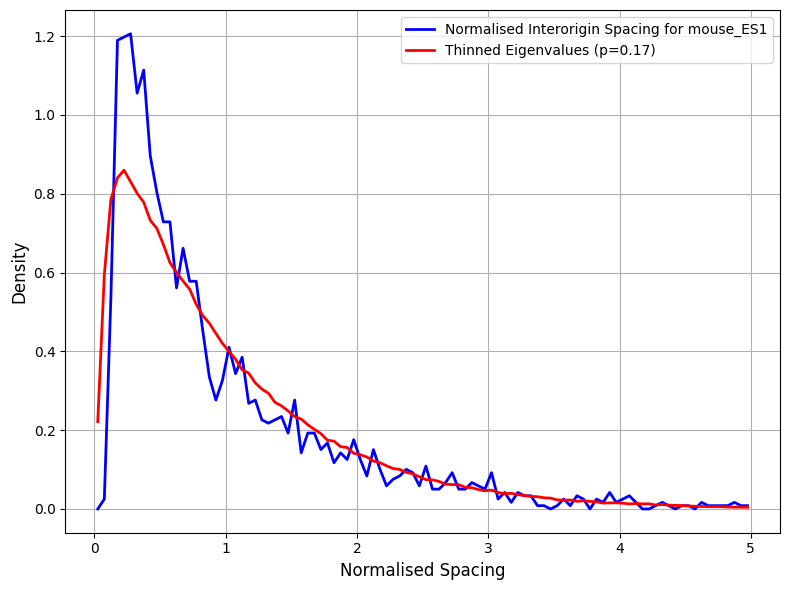

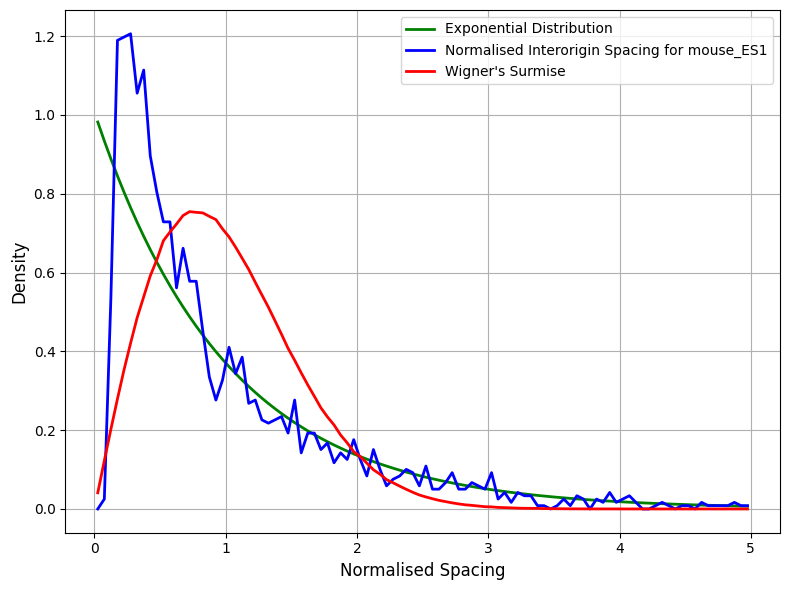

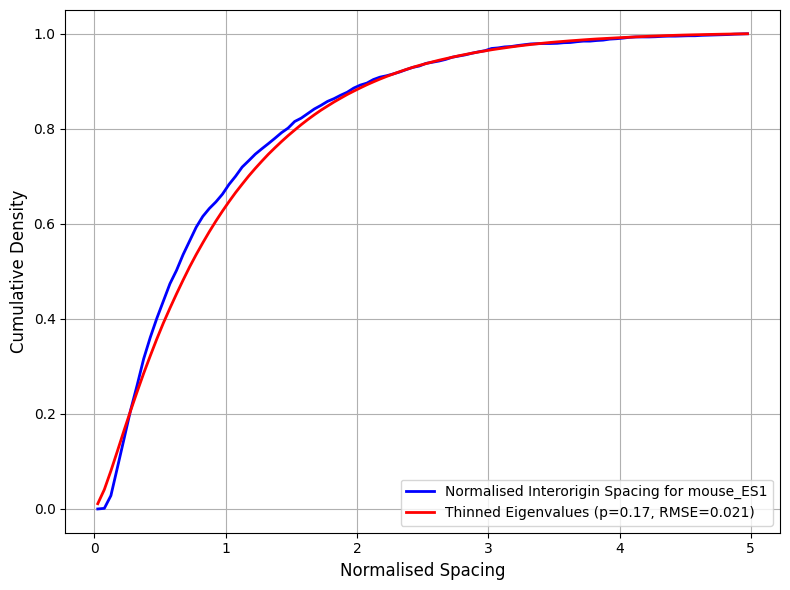

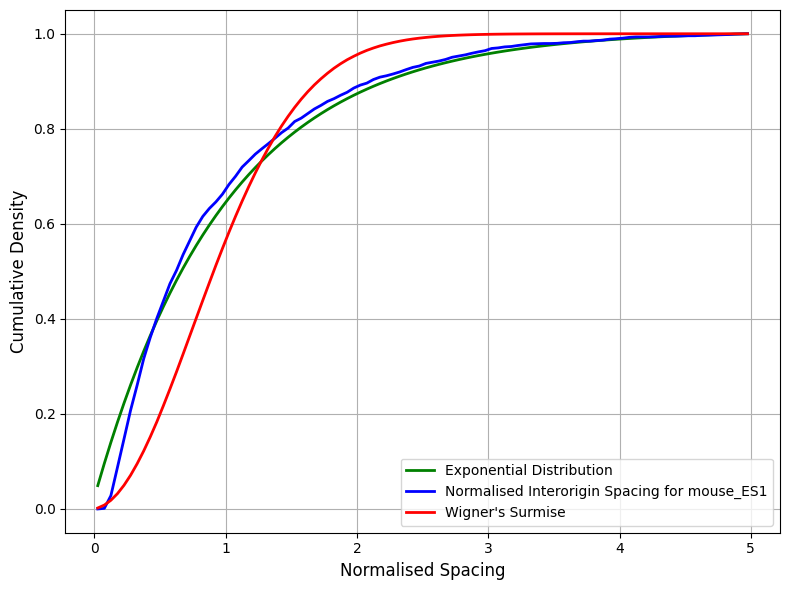

Done with:  mouse_ES1


mouse_MEF_Interorigin_spacing.csv
Extracting File:  mouse_MEF
Creating Histogram for:  mouse_MEF
1.0
Plotting DNA and Thinned for:  mouse_MEF
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


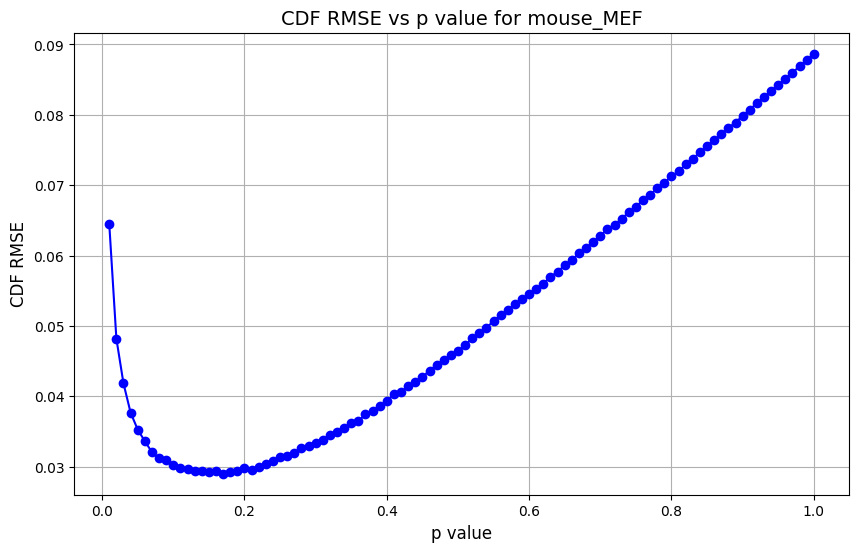

Minimum p value in coarse search: 0.17 with CDF RMSE: 0.02899010573261463


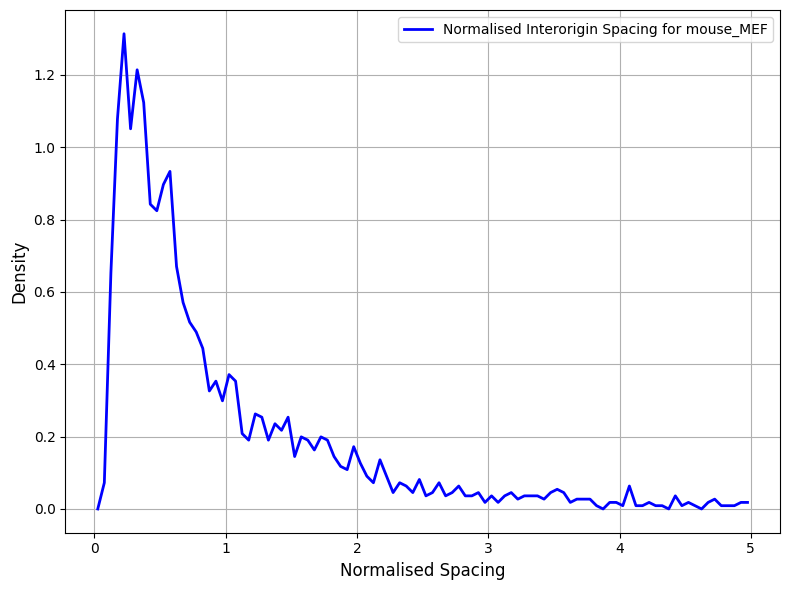

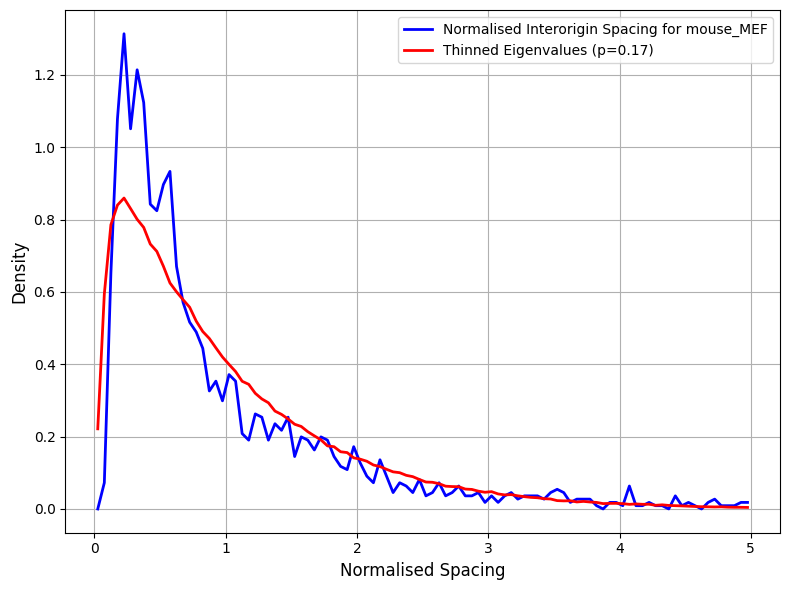

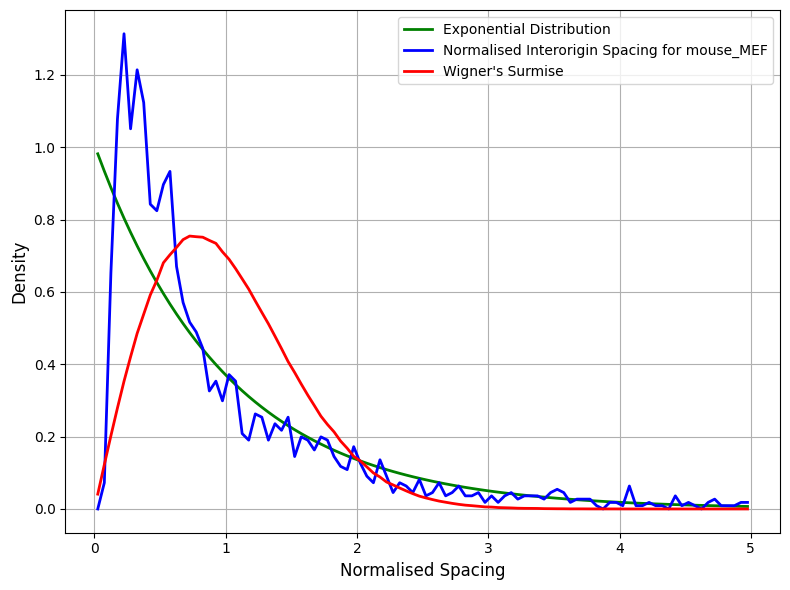

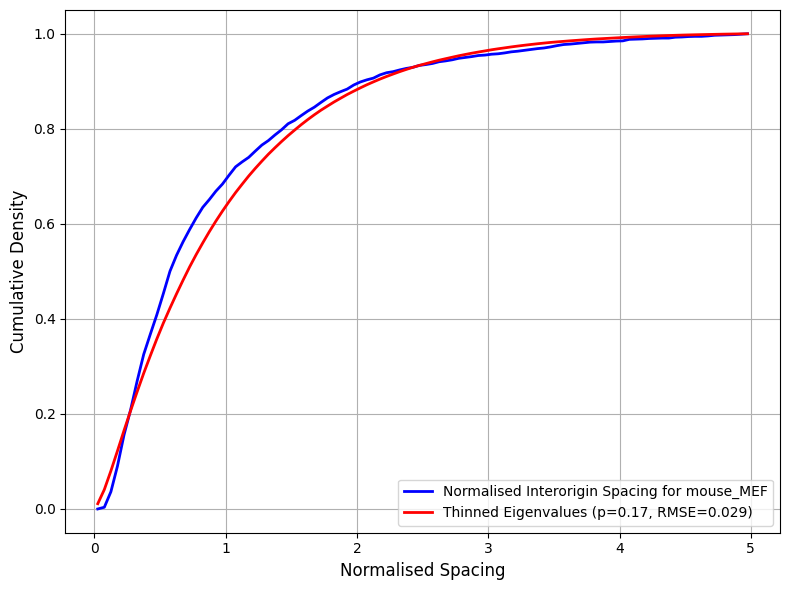

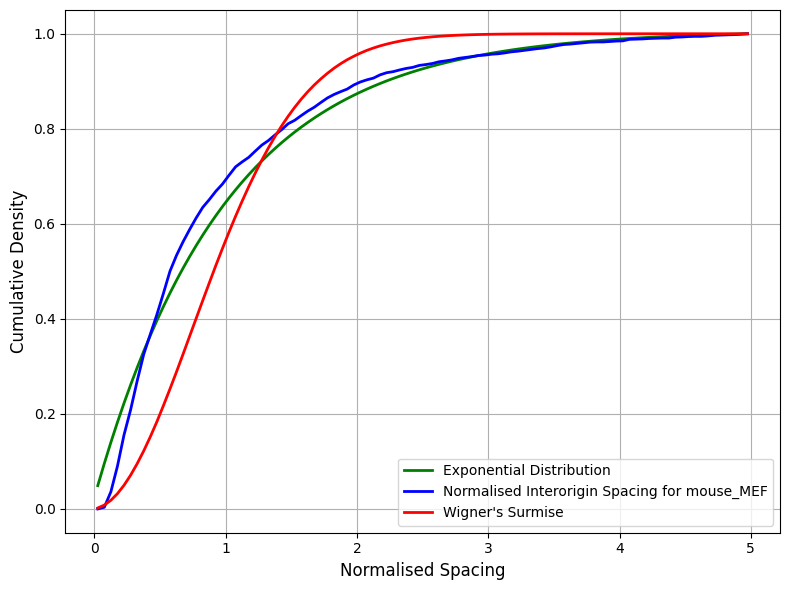

Done with:  mouse_MEF


mouse_P19_Interorigin_spacing.csv
Extracting File:  mouse_P19
Creating Histogram for:  mouse_P19
1.0000000000000002
Plotting DNA and Thinned for:  mouse_P19
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


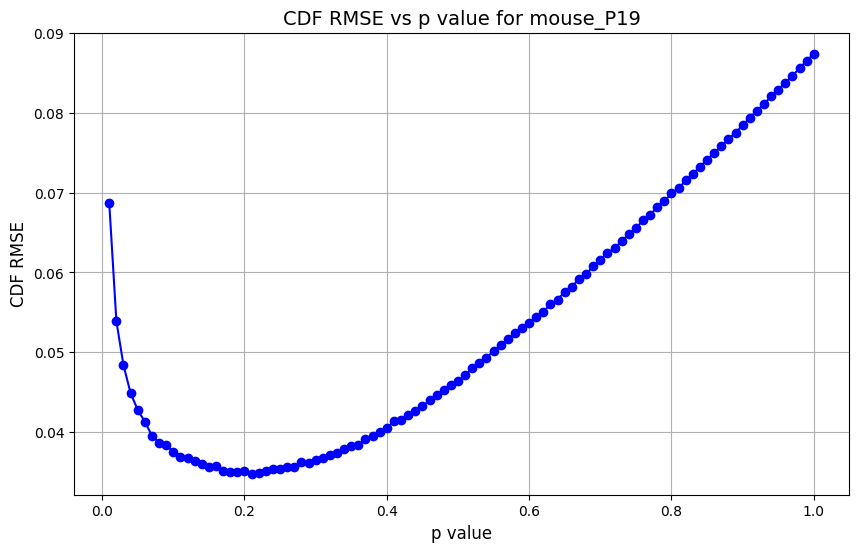

Minimum p value in coarse search: 0.21000000000000002 with CDF RMSE: 0.034782129367070834


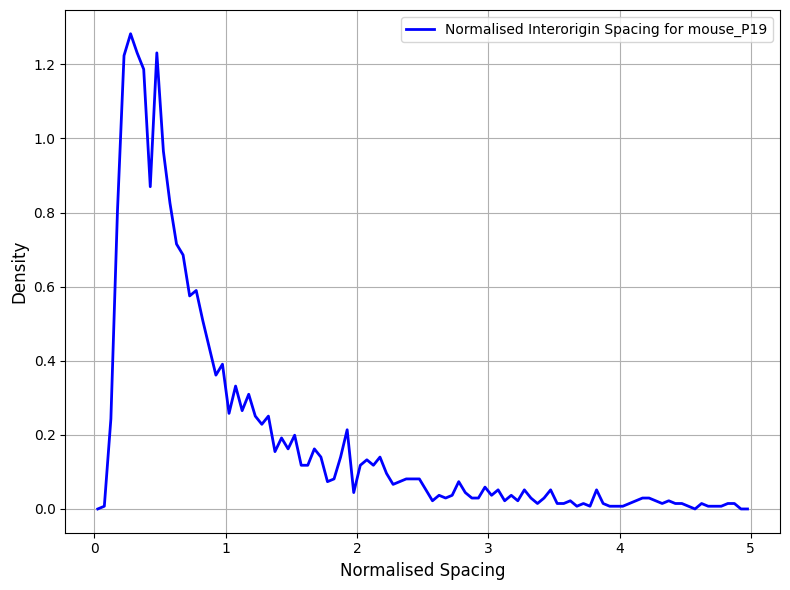

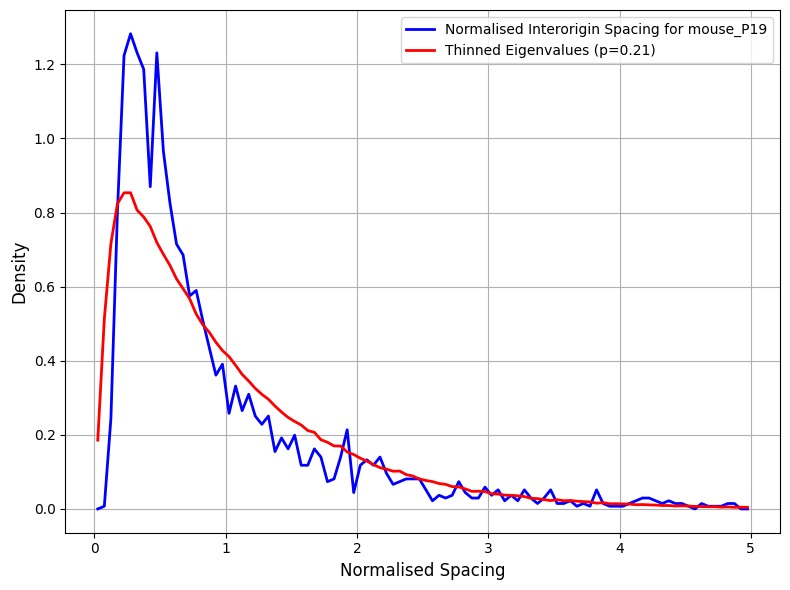

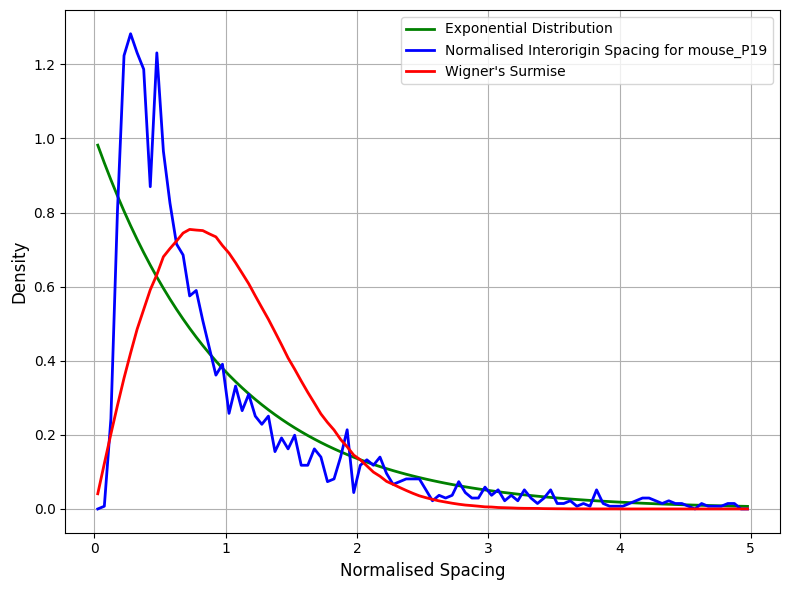

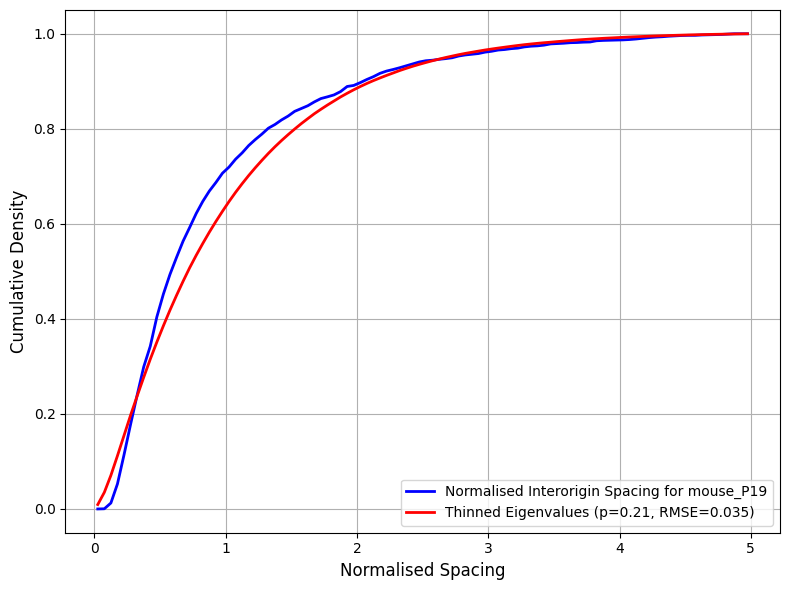

Done with:  mouse_P19


s_cerevisiae_Interorigin_spacing.csv
Extracting File:  s_cerevisiae
Creating Histogram for:  s_cerevisiae
1.0
Plotting DNA and Thinned for:  s_cerevisiae
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


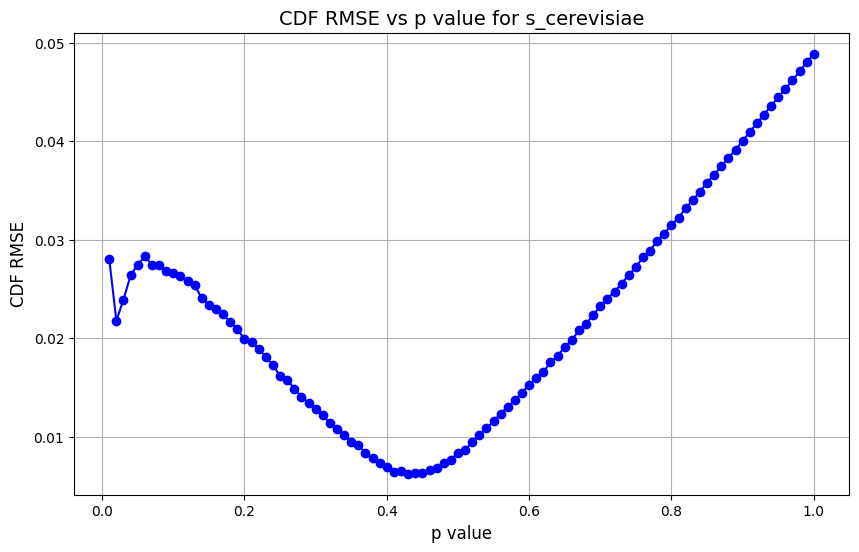

Minimum p value in coarse search: 0.43 with CDF RMSE: 0.0062476989787846856


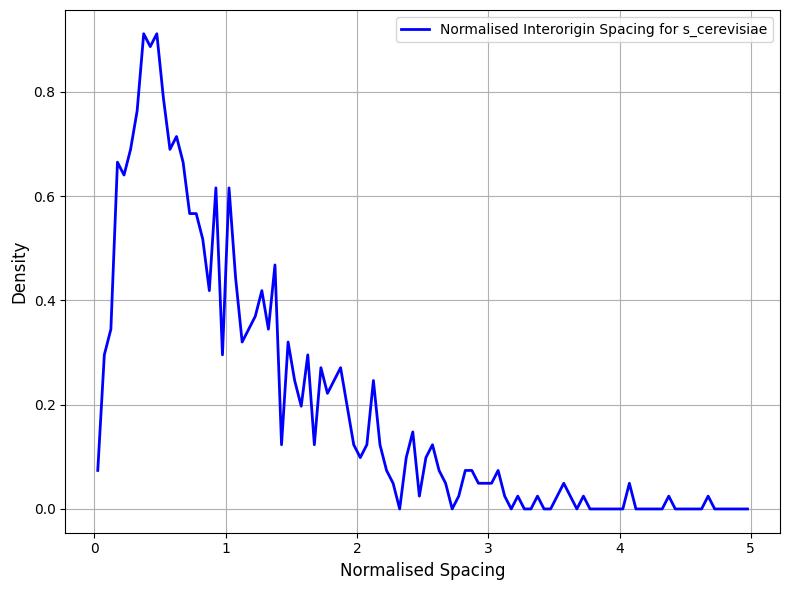

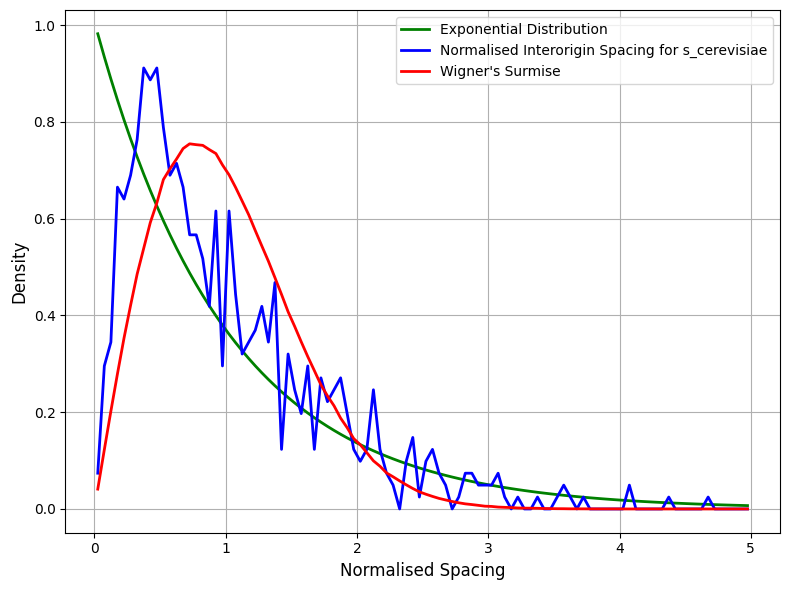

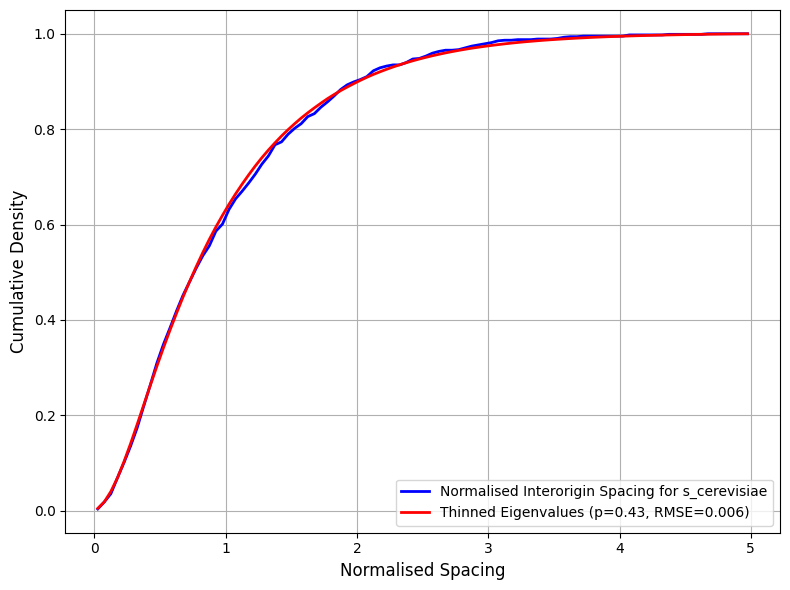

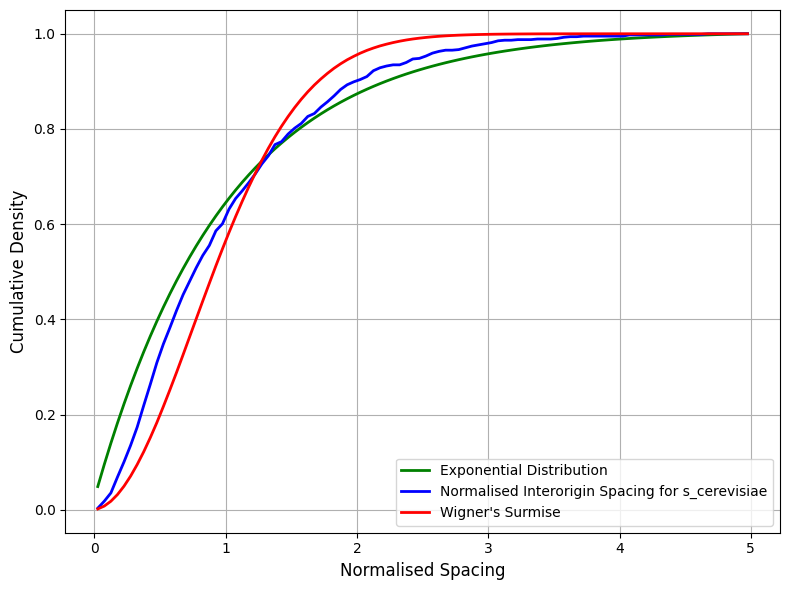

Done with:  s_cerevisiae


S_pombe_Interorigin_spacing.csv
Extracting File:  S_pombe
Creating Histogram for:  S_pombe
1.0
Plotting DNA and Thinned for:  S_pombe
p= 0.01
p= 0.02
p= 0.03
p= 0.04
p= 0.05
p= 0.06
p= 0.07
p= 0.08
p= 0.09
p= 0.1
p= 0.11
p= 0.12
p= 0.13
p= 0.14
p= 0.15
p= 0.16
p= 0.17
p= 0.18
p= 0.19
p= 0.2
p= 0.21
p= 0.22
p= 0.23
p= 0.24
p= 0.25
p= 0.26
p= 0.27
p= 0.28
p= 0.29
p= 0.3
p= 0.31
p= 0.32
p= 0.33
p= 0.34
p= 0.35
p= 0.36
p= 0.37
p= 0.38
p= 0.39
p= 0.4
p= 0.41
p= 0.42
p= 0.43
p= 0.44
p= 0.45
p= 0.46
p= 0.47
p= 0.48
p= 0.49
p= 0.5
p= 0.51
p= 0.52
p= 0.53
p= 0.54
p= 0.55
p= 0.56
p= 0.57
p= 0.58
p= 0.59
p= 0.6
p= 0.61
p= 0.62
p= 0.63
p= 0.64
p= 0.65
p= 0.66
p= 0.67
p= 0.68
p= 0.69
p= 0.7
p= 0.71
p= 0.72
p= 0.73
p= 0.74
p= 0.75
p= 0.76
p= 0.77
p= 0.78
p= 0.79
p= 0.8
p= 0.81
p= 0.82
p= 0.83
p= 0.84
p= 0.85
p= 0.86
p= 0.87
p= 0.88
p= 0.89
p= 0.9
p= 0.91
p= 0.92
p= 0.93
p= 0.94
p= 0.95
p= 0.96
p= 0.97
p= 0.98
p= 0.99
p= 1.0


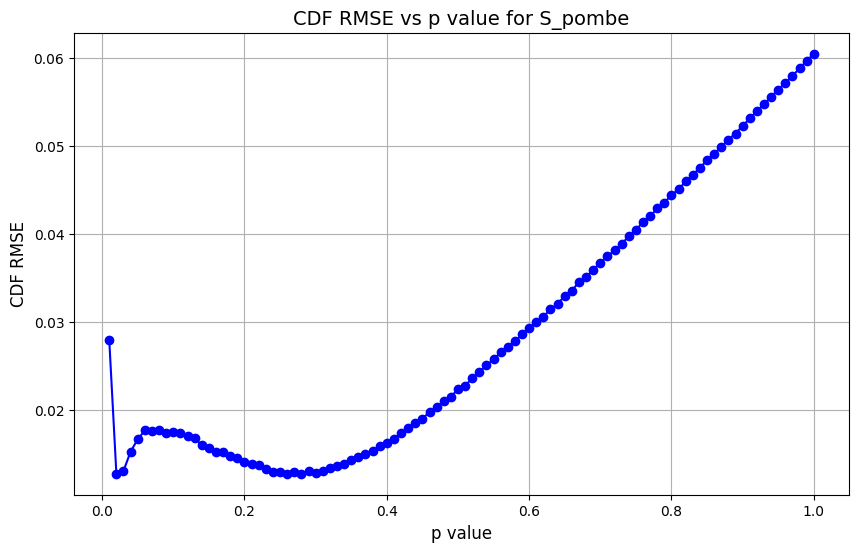

Minimum p value in coarse search: 0.28 with CDF RMSE: 0.012784076475873084


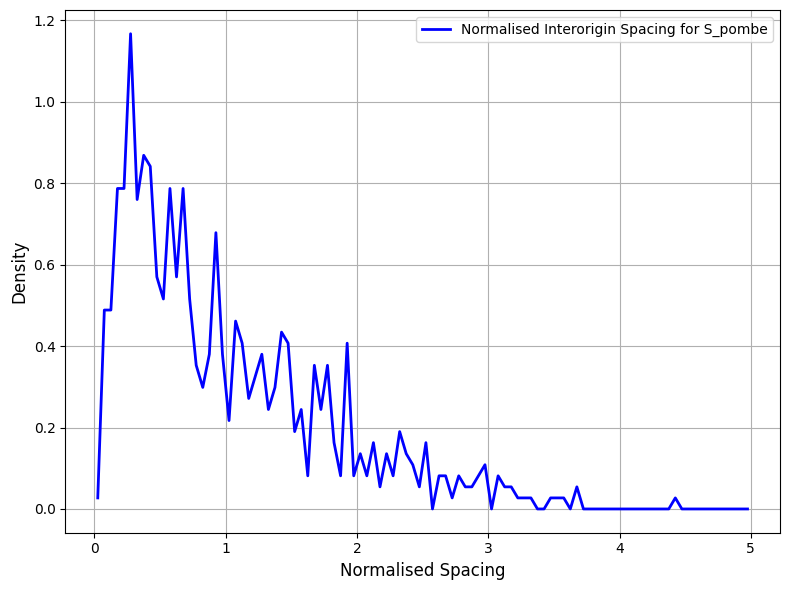

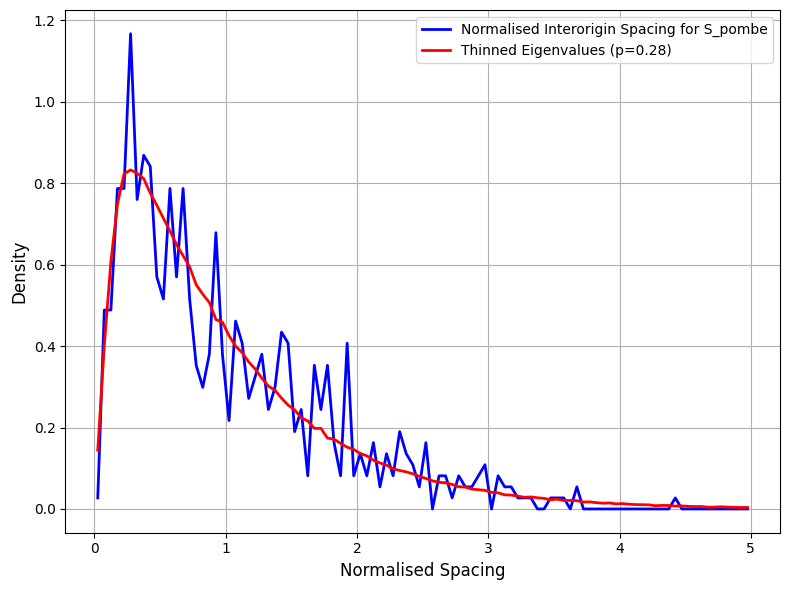

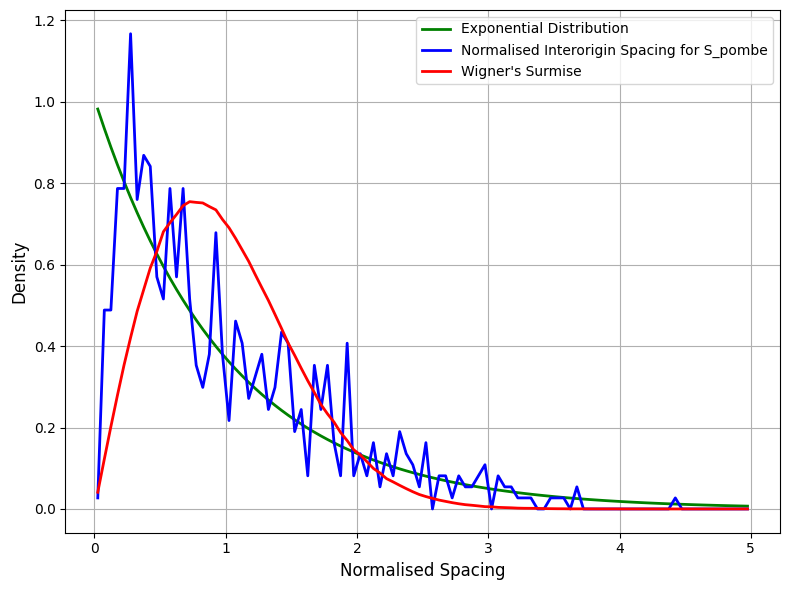

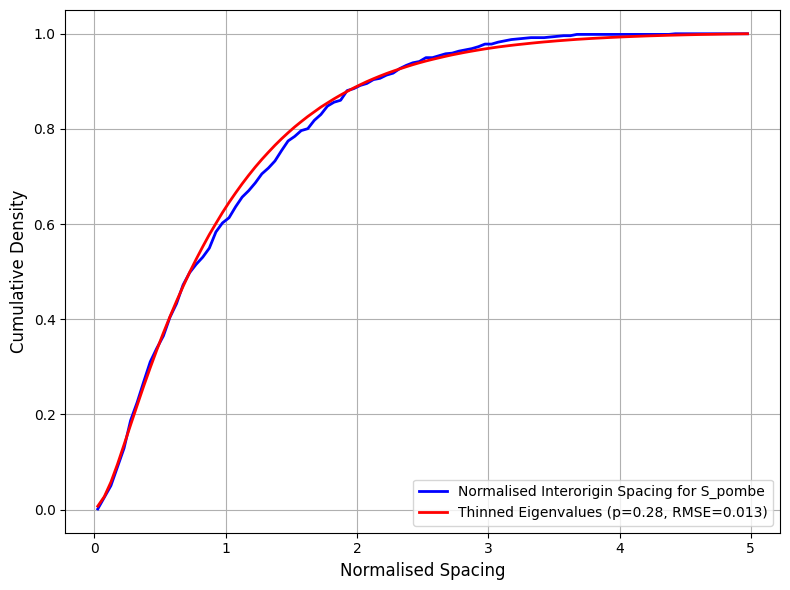

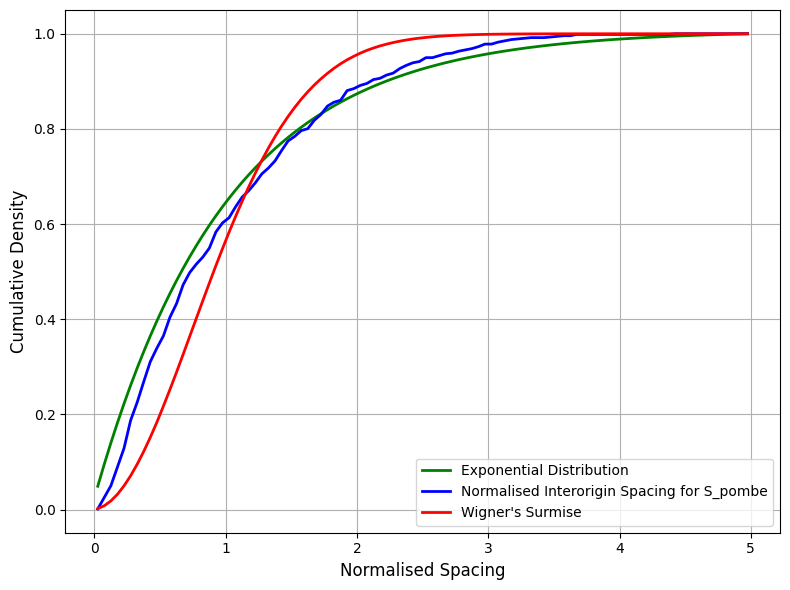

Done with:  S_pombe




In [9]:

for filename in os.listdir('processeddata'):
    print(filename)
    name = filename.split('_Interorigin')[0]
    print("Extracting File: ", name)
    dna = RMT.file_extractor(name, "Interorigin_spacing")
    #print(dna)

    print("Creating Histogram for: ", name)
    dnahist, bins = RMT.dna_histogram(dna, Lower=0, Upper=5, binno=100)
    # Plot DNA histogram

    print("Plotting DNA and Thinned for: ", name)
    RMT.plot_dna_and_thinned(name, dnahist, ThinnedDict=ThinnedDict)
    print("Done with: ", name)
    print("\n")
    
